# Functions and Code (Annotated)
### Akash Rathi
### akash@u.northwestern.edu


In [190]:
#Assuming this is data with genders for all authors including those with initials for their first name.

import pandas as pd
import numpy as np
import statistics
import math

df = pd.read_csv('final_data.csv')

data = df

data = data.drop(['level_0','index'], axis = 1) #OPTIONAL ****only use if there are indices that were previously reset.

In [191]:
data['Author Count'] = 0
for i in range(0,data.shape[0]):
   data['Author Count'][i] = data['M/M'][i]+data['M/F'][i]+data['F/M'][i]+data['F/F'][i]
data = data[data['Author Count'] != 0]
data.drop(['level_0'], axis=1)

<ipython-input-191-ed0fce95e83d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Author Count'][i] = data['M/M'][i]+data['M/F'][i]+data['F/M'][i]+data['F/F'][i]


KeyError: "['level_0'] not found in axis"

In [200]:
data.reset_index(drop=True, inplace=True)

In [201]:
data = data[data['Author Count'] != 0]

In [202]:
#Dropping all authors with initials for their first names

drop_list = []
for i,first in enumerate(data.first_author):
  first_name = first.split(',')[1]
  if len(first_name) <= 3:
    drop_list.append(i)

for i,first in enumerate(data.last_author):
  first_name = first.split(',')[1]
  if len(first_name) <= 3:
    drop_list.append(i)

data = data.drop(drop_list, axis=0).reset_index()

## Figure 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


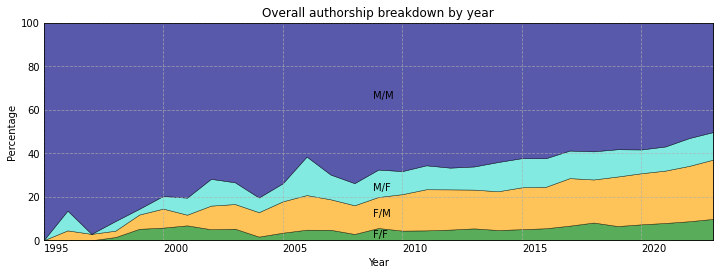

In [312]:
import matplotlib.pyplot as plt

def fig1_overall(data, labels=['F/F', 'F/M', 'M/F', 'M/M'],colors=['green', 'orange', 'turquoise', 'navy']):
    # Calculate the percentage of each category for each year
    percentage_data = data.groupby(['Publication Year', 'Gender']).size().reset_index(name='Count')
    percentage_data['Percentage'] = percentage_data.groupby('Publication Year')['Count'].transform(lambda x: (x / x.sum()) * 100)

    # Pivot the data for a stacked area plot
    stacked_data = percentage_data.pivot(index='Publication Year', columns='Gender', values='Percentage').fillna(0)

    # Create a stacked area plot
    plt.figure(figsize=(12, 4))
    stacks = plt.stackplot(stacked_data.index, stacked_data['F/F'], stacked_data['F/M'], 
                           stacked_data['M/F'], stacked_data['M/M'], 
                           colors=colors, 
                           alpha=0.65, linewidth=0.5, edgecolor='black')

    # Set plot labels and title
    plt.title('Overall authorship breakdown by year')
    plt.xlabel('Year')
    plt.ylabel('Percentage')

    # Round x-axis to the nearest whole number and rotate the x-values to the left
    x_ticks = range(int(stacked_data.index.min()), int(stacked_data.index.max()) + 1, 5)
    plt.xticks(x_ticks, rotation=0, ha='left')
    #plt.xticks([round(x) for x in stacked_data.index], rotation=45, ha='left')

    # Remove tick marks on both axes
    plt.tick_params(axis='both', which='both', length=0)

    # Change background color to white
    plt.gca().set_facecolor('white')

    # Add labels to each section
    for stack, label in zip(stacks, labels):
        path = stack.get_paths()[0]
        x_center = path.vertices[:, 0].mean()
        y_center = path.vertices[:, 1].mean()
        plt.text(x_center, y_center, label, color='black', va='center', ha='left')


    plt.grid(True, linestyle='--', alpha=0.7, zorder=0)


    # Remove the legend
    plt.legend().set_visible(False)

    # Add black borders to the entire plot
    plt.margins(0, 0)
    #plt.savefig('/content/drive/My Drive/BrownMedResearch/authorship_overall.pdf', format='pdf')

    # Show the plot
    plt.show()

#Calling the function
fig1_overall(data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


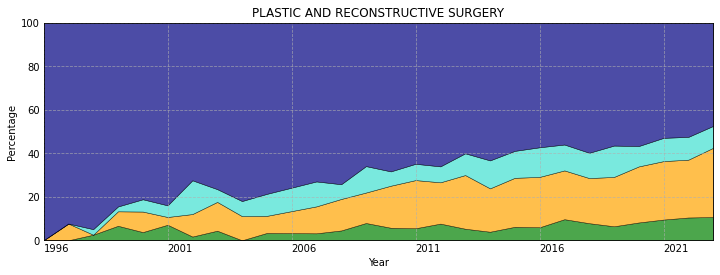

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


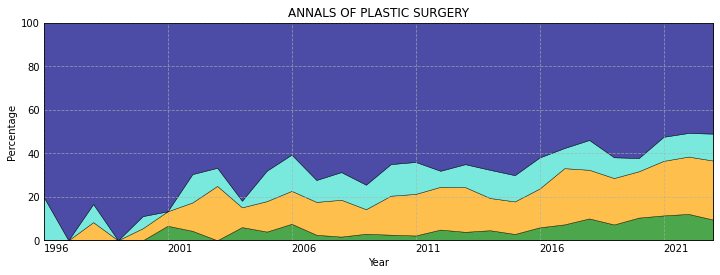

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


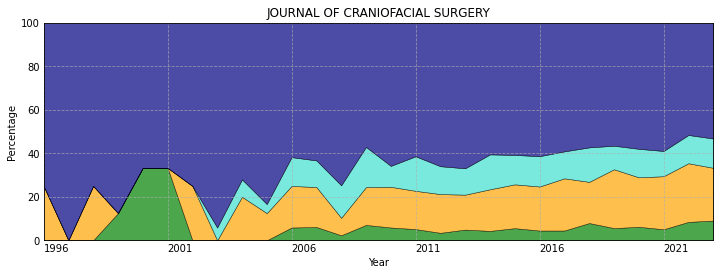

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


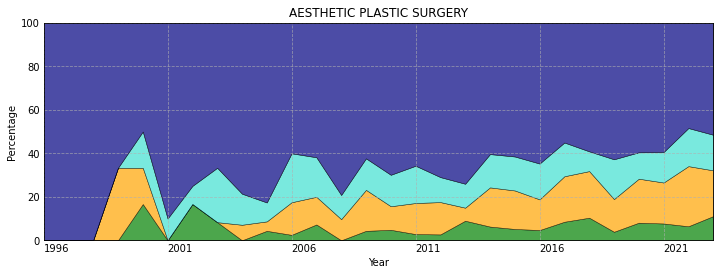

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


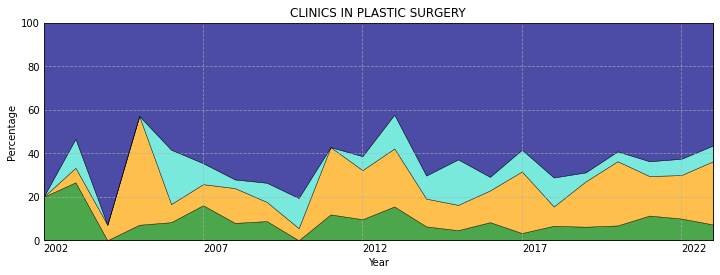

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


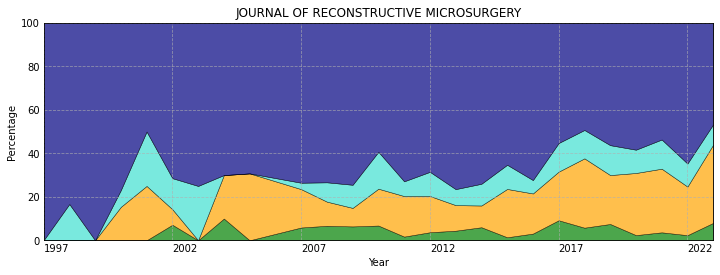

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


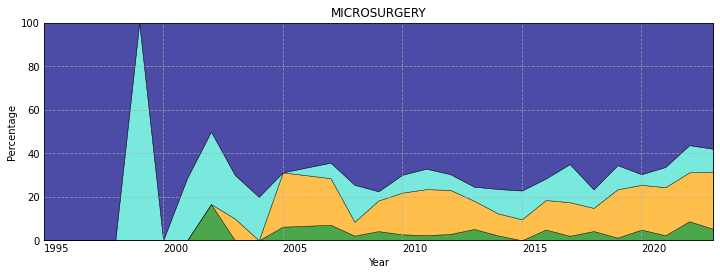

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


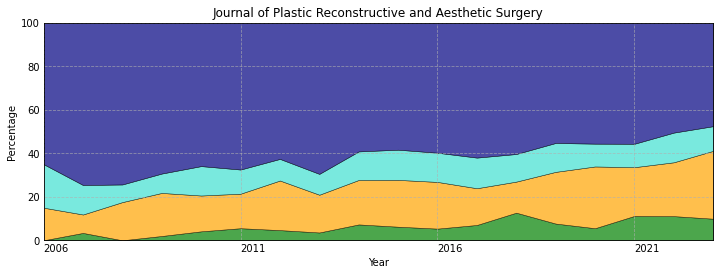

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


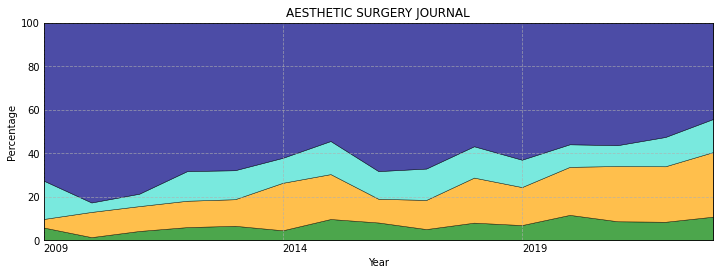

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


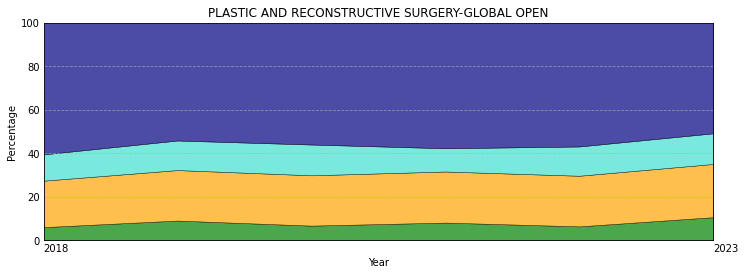

In [313]:
import matplotlib.pyplot as plt

def fig1_journal(data, colors=['green', 'orange', 'turquoise', 'navy']):
    # Iterate over unique journals
    for journal in data['Journal Name'].unique():
        # Filter data for the current journal
        journal_data = data[data['Journal Name'] == journal]

        # Calculate the percentage of each category for each year
        percentage_data = journal_data.groupby(['Publication Year', 'Gender']).size().reset_index(name='Count')
        percentage_data['Percentage'] = percentage_data.groupby('Publication Year')['Count'].transform(lambda x: (x / x.sum()) * 100)

        # Pivot the data for a stacked area plot
        stacked_data = percentage_data.pivot(index='Publication Year', columns='Gender', values='Percentage').fillna(0)

        # Create a stacked area plot
        plt.figure(figsize=(12, 4))
        stacks = plt.stackplot(stacked_data.index, stacked_data['F/F'], 
                               stacked_data['F/M'], stacked_data['M/F'], 
                               stacked_data['M/M'], colors=colors, 
                               alpha=0.7, linewidth=0.5, edgecolor='black')

        # Set plot labels and title
        plt.title(f'{journal}')
        plt.xlabel('Year')
        plt.ylabel('Percentage')

        # Round x-axis to the nearest whole number and rotate the x-values to the left
        x_ticks = range(int(stacked_data.index.min()), int(stacked_data.index.max()) + 1, 5)
        plt.xticks(x_ticks, rotation=0, ha='left')
        #plt.xticks([round(x) for x in stacked_data.index], rotation=45, ha='left')

        # Remove tick marks on both axes
        plt.tick_params(axis='both', which='both', length=0)

        # Change background color to white
        plt.gca().set_facecolor('white')

        # Add labels to each section
        #for stack, label in zip(stacks, ['F/F', 'F/M', 'M/F', 'M/M']):
         #   path = stack.get_paths()[0]
            #x_center = path.vertices[:, 0].quartile(0.75)
            #y_center = path.vertices[:, 1].mean()
          #  plt.text(x_center, y_center, label, color='black', va='bottom', ha='left')

        plt.grid(True, linestyle='--', alpha=0.7, zorder=0)

        # Remove the legend
        plt.legend().set_visible(False)

        # Add black borders to the entire plot
        plt.margins(0, 0)

        #plt.savefig(f'/content/drive/My Drive/BrownMedResearch/{journal}_authorship.pdf', format='pdf')

        # Show the plot
        plt.show()

#Call the function
fig1_journal(data)

In [325]:
percentage_data = data.groupby(['Publication Year', 'Gender']).size().reset_index(name='Count')
percentage_data['Percentage'] = percentage_data.groupby('Publication Year')['Count'].transform(lambda x: (x / x.sum()))
stacked_data = percentage_data.pivot(index='Publication Year', columns='Gender', values='Percentage').fillna(0)

In [346]:
data['MM_yearly_prop'] = 0
for i in range(0, len(data)):
    year = data['Publication Year'][i]-1995
    data['MM_yearly_prop'][i] = stacked_data.iloc[year,3]
    
data['MF_yearly_prop'] = 0
for i in range(0, len(data)):
    year = data['Publication Year'][i]-1995
    data['MF_yearly_prop'][i] = stacked_data.iloc[year,2]

data['FM_yearly_prop'] = 0
for i in range(0, len(data)):
    year = data['Publication Year'][i]-1995
    data['FM_yearly_prop'][i] = stacked_data.iloc[year,1]

data['FF_yearly_prop'] = 0
for i in range(0, len(data)):
    year = data['Publication Year'][i]-1995
    data['FF_yearly_prop'][i] = stacked_data.iloc[year,0]

<ipython-input-346-45f77bb4566a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MM_yearly_prop'][i] = stacked_data.iloc[year,3]
<ipython-input-346-45f77bb4566a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MF_yearly_prop'][i] = stacked_data.iloc[year,2]
<ipython-input-346-45f77bb4566a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FM_yearly_prop'][i] = stacked_data.iloc[year,1]
<ipython-input-346-45f77bb4566

In [347]:
data

,index,Author Full Names,Journal Name,Article Type,Cited References,Total times cited,Publication Month,Publication Year,DOI,first_author,...,F/M,F/F,M/M Self Cite,M/F Self Cite,F/M Self Cite,F/F Self Cite,MM_yearly_prop,MF_yearly_prop,FM_yearly_prop,FF_yearly_prop
0,4,"Mowlavi, Arian; Bass, Michael J.; Khurshid, KA...",PLASTIC AND RECONSTRUCTIVE SURGERY,Article,"arashiro k, 1995, j reconstr microsurg, v11, p...",14,5,2004,10.1097/01.prs.0000117187.36061.bd,"Mowlavi, Arian",...,1,0,0,0,0,0,0.803371,0.067416,0.112360,0.016854
1,6,"Carruthers, Jean; Fagien, Steven; Matarasso, S...",PLASTIC AND RECONSTRUCTIVE SURGERY,Article,"ahn ky, 2000, plast reconstr surg, v105, p778,...",215,11,2004,10.1097/01.prs.0000144795.76040.d3,"Carruthers, Jean",...,0,0,0,0,0,0,0.803371,0.067416,0.112360,0.016854
2,9,"Hess, Christopher L.; Howard, Michael A.; Atti...",ANNALS OF PLASTIC SURGERY,Article,"[anonymous], 1987, physiotherapy; [anonymous],...",90,8,2003,10.1097/01.sap.0000058513.10033.6b,"Hess, Christopher L.",...,0,0,0,0,0,0,0.733333,0.100000,0.113333,0.053333
3,11,"Ching, Shim; Thoma, A; McCabe, RE; Antony, Mar...",PLASTIC AND RECONSTRUCTIVE SURGERY,Review,"alsarraf r, 2000, aesthet plast surg, v24, p19...",229,1,2003,10.1097/01.prs.0000036041.67101.48,"Ching, Shim",...,0,1,0,0,0,0,0.733333,0.100000,0.113333,0.053333
4,12,"Yazar, Sukru; Lin, CH; Wei, Fu-Chan",PLASTIC AND RECONSTRUCTIVE SURGERY,Article,"arai k, 2002, plast reconstr surg, v109, p2301...",228,11,2004,10.1097/01.prs.0000138811.88807.65,"Yazar, Sukru",...,0,0,0,0,0,0,0.803371,0.067416,0.112360,0.016854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27513,28883,"Bao Nan, Nan; Yang Bo, Nan; Song Yun-Hai, Nan;...",JOURNAL OF CRANIOFACIAL SURGERY,Article,"albright al, 1985, neurosurgery, v17, p329; fa...",3,3,2015,10.1097/scs.0000000000001476,"Bao Nan, Nan",...,0,0,0,0,0,0,0.622192,0.134105,0.192648,0.051055
27514,28884,"Wei Wei, Wei; Zhang Qiuhang, Wei; Guo Hongchua...",JOURNAL OF CRANIOFACIAL SURGERY,Article,"curry mp, 2001, otolaryng head neck, v125, p56...",1,3,2015,10.1097/scs.0000000000001163,"Wei Wei, Wei",...,0,0,0,0,0,0,0.622192,0.134105,0.192648,0.051055
27515,28885,"Liu Lei, Lei; Zhao Shichun, Lei; Liu Zhenzhong...",JOURNAL OF CRANIOFACIAL SURGERY,Article,"akter f, 2017, j plast reconstr aes, v70, p416...",1,3,2020,10.1097/scs.0000000000006203,"Liu Lei, Lei",...,2,1,0,0,0,0,0.582254,0.109353,0.235012,0.073381
27516,28888,"Chien-Chung Chen, Chen; Ching-Hsiang Yang, Che...",PLASTIC AND RECONSTRUCTIVE SURGERY-GLOBAL OPEN,Article,"brucoli m, 2020, oral maxillofac surg, v24, p1...",2,2,2022,10.1097/gox.0000000000004149,"Chien-Chung Chen, Chen",...,1,0,0,0,0,0,0.529747,0.127954,0.254686,0.087612


## Figure 2 (GAM Model Definitions + Code)

In [ ]:
pip install pygam

In [765]:
# Define a dataframe for your bootstrap values
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])

# Define a dataframe for your expected values
expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])

# Set your model data with relevant columns from your original dataset
model_data = data[['MM_yearly_prop', 'Publication Year','Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'].between(2006, 2023, inclusive=True)) &

                        ((model_data['Journal Name'] == 'JOURNAL OF CRANIOFACIAL SURGERY') |
                         (model_data['Journal Name'] == 'PLASTIC AND RECONSTRUCTIVE SURGERY') |
                         (model_data['Journal Name'] == 'ANNALS OF PLASTIC SURGERY') |
                         (model_data['Journal Name'] == 'Journal of Plastic Reconstructive and Aesthetic Surgery') |
                         (model_data['Journal Name'] == 'AESTHETIC PLASTIC SURGERY') )]



<ipython-input-765-51f127564436>:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  model_data = model_data[(model_data['Publication Year'].between(2006, 2023, inclusive=True)) &


In [766]:
def calculate_p_value(bootstrap_results, null_value=0):
    # Calculate the mean and standard error of the bootstrap results
    mean_bootstrap = np.mean(bootstrap_results)
    se_bootstrap = np.std(bootstrap_results)

    # Calculate the z-score for the null hypothesis
    z_score = (null_value - mean_bootstrap) / se_bootstrap

    # Calculate the two-tailed p-value
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    return p_value

In [767]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pygam import LinearGAM, s, f, PoissonGAM
from tqdm import tqdm  # For progress bar
import statistics


def gam_model(model_data, bootstrap_df, expected_df, bootstrap_name, expected_name, n_bootstrap=1000):
    # Define predictors and target
    test_data = model_data
    X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]

    # Use LabelEncoder for categorical variables
    label_encoder = LabelEncoder()
    X_test_encoded = X_test.copy()
    X_test_encoded['Journal Name'] = label_encoder.fit_transform(X_test['Journal Name'])
    X_test_encoded['Publication Month'] = label_encoder.fit_transform(X_test['Publication Month'])

    y_test = test_data['M/M']/test_data['Author Count']  # Assuming 'M/M' is the category to predict
    
    
    
    train_data = data
    train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
    X_train = train_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]

    # Use LabelEncoder for categorical variables
    label_encoder = LabelEncoder()
    X_train_encoded = X_train.copy()
    X_train_encoded['Journal Name'] = label_encoder.fit_transform(X_train['Journal Name'])
    X_train_encoded['Publication Month'] = label_encoder.fit_transform(X_train['Publication Month'])

    y_train = train_data['M/M']/train_data['Author Count']  # Assuming 'M/M' is the category to predict
    
    
    
    

    # Number of bootstrap iterations
    n_bootstrap = n_bootstrap

    lam = 0.01

    # Initialize list to store bootstrap results
    bootstrap_results = []


    ###DEFINE SAMPLES###
    n_samples = round(0.20*len(y))
    
    expected_proportions_bootstrap_list = []
    # Bootstrap loop
    for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
        # Sample with replacement
        sample_indices = np.random.choice(n_samples, n_samples, replace=True)
        X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
        X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
        y_train_bootstrap = y_train.iloc[sample_indices]

        # Fit the GAM model on the bootstrap sample
        gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)

        # Predict the probabilities for each category
        expected_bootstrap = gam_bootstrap.predict(X_test_encoded)

        # Calculate over- and undercitation measures
        observed_proportions = (test_data['M/M']/test_data['Author Count']).mean()
        expected_proportions_bootstrap = expected_bootstrap.mean()

        delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions


        # Append to bootstrap results
        bootstrap_results.append(delta_mean_percentage)
        expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)

    bootstrap_df['M/M_bootstrap_vals'] = bootstrap_results
    expected_df['M/M_expected'] = expected_proportions_bootstrap_list

    # Calculate the 95% confidence interval
    se_means = np.std(bootstrap_results)
    mm_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))
    # Print the confidence interval
    print(f'95% Confidence Interval: {mm_confidence_interval}')
    mm_p_val = calculate_p_value(bootstrap_results)
    print(f'p-value: {mm_p_val}')



    y_train = train_data['M/F']/train_data['Author Count']  # Assuming 'M/M' is the category to predict
    
    test_data = model_data
    X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]

    # Number of bootstrap iterations


    # Initialize list to store bootstrap results
    bootstrap_results = []

    expected_proportions_bootstrap_list = []

    # Bootstrap loop
    for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
        # Sample with replacement
        sample_indices = np.random.choice(n_samples, n_samples, replace=True)
        X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
        X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
        y_train_bootstrap = y_train.iloc[sample_indices]

        # Fit the GAM model on the bootstrap sample
        gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)

        # Predict the probabilities for each category
        expected_bootstrap = gam_bootstrap.predict(X_test_encoded)

        # Calculate over- and undercitation measures
        observed_proportions = (test_data['M/F']/test_data['Author Count']).mean()
        expected_proportions_bootstrap = expected_bootstrap.mean()

        delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions


        # Append to bootstrap results
        bootstrap_results.append(delta_mean_percentage)
        expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)

    bootstrap_df['M/F_bootstrap_vals'] = bootstrap_results
    expected_df['M/F_expected'] = expected_proportions_bootstrap_list
    # Calculate the 95% confidence interval
    se_means = np.std(bootstrap_results)
    mf_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))
    # Print the confidence interval
    print(f'95% Confidence Interval: {mf_confidence_interval}')
    mf_p_val = calculate_p_value(bootstrap_results)
    print(f'p-value: {mf_p_val}')





    y_train = train_data['F/M']/train_data['Author Count']  # Assuming 'M/M' is the category to predict
    
    test_data = model_data
    X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]


    # Initialize list to store bootstrap results
    bootstrap_results = []

    expected_proportions_bootstrap_list = []

    # Bootstrap loop
    for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
        # Sample with replacement
        sample_indices = np.random.choice(n_samples, n_samples, replace=True)
        X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
        X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
        y_train_bootstrap = y_train.iloc[sample_indices]

        # Fit the GAM model on the bootstrap sample
        gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)

        # Predict the probabilities for each category
        expected_bootstrap = gam_bootstrap.predict(X_test_encoded)

        # Calculate over- and undercitation measures
        observed_proportions = (test_data['F/M']/test_data['Author Count']).mean()
        expected_proportions_bootstrap = expected_bootstrap.mean()

        delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions

        #lower_limit = -100  # Set your lower limit
        #upper_limit = 100  # Set your upper limit

        #delta_mean_percentage = np.clip(delta_mean_percentage, lower_limit, upper_limit)

        # Append to bootstrap results
        bootstrap_results.append(delta_mean_percentage)
        expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)

    bootstrap_df['F/M_bootstrap_vals'] = bootstrap_results
    expected_df['F/M_expected'] = expected_proportions_bootstrap_list
    # Calculate the 95% confidence interval
    se_means = np.std(bootstrap_results)
    fm_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))

    # Print the confidence interval
    print(f'95% Confidence Interval: {fm_confidence_interval}')
    fm_p_val = calculate_p_value(bootstrap_results)
    print(f'p-value: {fm_p_val}')



    y_train = train_data['F/F']/train_data['Author Count']  # Assuming 'M/M' is the category to predict
    
    test_data = model_data
    X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]

    # Initialize list to store bootstrap results
    bootstrap_results = []
    
    expected_proportions_bootstrap_list = []

    # Bootstrap loop
    for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
        # Sample with replacement
        sample_indices = np.random.choice(n_samples, n_samples, replace=True)
        X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
        X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
        y_train_bootstrap = y_train.iloc[sample_indices]

        # Fit the GAM model on the bootstrap sample
        gam_bootstrap = LinearGAM(s(0, n_splines=5) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)

        # Predict the probabilities for each category
        expected_bootstrap = gam_bootstrap.predict(X_test_encoded)

        # Calculate over- and undercitation measures
        observed_proportions = (test_data['F/F']/test_data['Author Count']).mean()
        expected_proportions_bootstrap = expected_bootstrap.mean()

        delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions

        # Append to bootstrap results
        bootstrap_results.append(delta_mean_percentage)
        expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)

    bootstrap_df['F/F_bootstrap_vals'] = bootstrap_results
    expected_df['F/F_expected'] = expected_proportions_bootstrap_list
    # Calculate the 95% confidence interval
    se_means = np.std(bootstrap_results)
    ff_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))

    # Print the confidence interval
    print(f'95% Confidence Interval: {ff_confidence_interval}')
    ff_p_val = calculate_p_value(bootstrap_results)
    print(f'p-value: {ff_p_val}')
    
    #SAVE BOOTSTRAP_DF
    bootstrap_df.to_csv(f'/Users/akashrathi/Desktop/BrownMed/{bootstrap_name}', index=False)
    
    #SAVE EXPECTED_DF
    expected_df.to_csv(f'/Users/akashrathi/Desktop/BrownMed/{expected_name}', index=False)
    
    return [mm_confidence_interval, mf_confidence_interval, fm_confidence_interval, ff_confidence_interval]

gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig2_top', 'expected_df_fig2_top', 1000)

<ipython-input-767-69f324e7d923>:26: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (0.42351235977781276, 0.5476198125557181)
p-value: 0.6276804547907022


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-0.3669170253683457, 0.14918258865322598)
p-value: 0.9791387546296404


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-1.5768056447286727, -1.1356500857030343)
p-value: 0.7031368442269841


Bootstrapping: 100%|██████████| 1000/1000 [04:46<00:00,  3.49it/s]


95% Confidence Interval: (-2.4852422880231653, -1.6496927512617705)
p-value: 0.7590508795808717


[(0.42351235977781276, 0.5476198125557181),
 (-0.3669170253683457, 0.14918258865322598),
 (-1.5768056447286727, -1.1356500857030343),
 (-2.4852422880231653, -1.6496927512617705)]

In [768]:
#Finding the placement of each bar. IT SHOULD BE NOTED THAT THE ACTUAL BOOTSTRAP VALUES ARE SOMETIMES UNRELIABLE.
# RUNNING THIS CODE WILL CALCULATE THE OVER/UNDERCITATION MANUALLY BASED ON EXPECTED AND OBSERVED VALUES

delta = bootstrap_df[['M/M_bootstrap_vals', 'M/F_bootstrap_vals',
                             'F/M_bootstrap_vals','F/F_bootstrap_vals']]
observed_df = model_data[['M/M', 'M/F','F/M','F/F']].reset_index(drop=True)
n_bootstrap = 1000
#Standard errors for each bar
se_means = np.std(delta)
conf_ints = 1.96*se_means/(n_bootstrap ** 0.5)

#You can also calculate 95% Confidence Intervals using this code which saves them to their own variables
# NOTE SE_MEANS IS USED IN THIS FIGURE DUE TO SMALLER VARIABILITY
mm_confidence_interval = conf_ints[0]
mf_confidence_interval = conf_ints[1]
fm_confidence_interval = conf_ints[2]
ff_confidence_interval = conf_ints[3]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


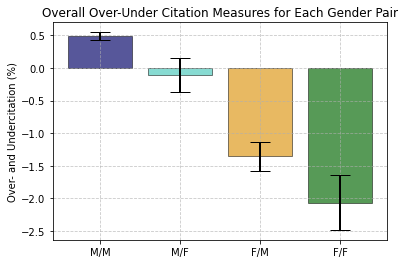

In [769]:
import seaborn as sns
import matplotlib.pyplot as plt

def fig_plotted(fig_name, delta=delta,conf_ints=conf_ints,
                colors=['navy', 'turquoise', 'orange', 'green'], labels=['M/M', 'M/F', 'F/M', 'F/F']):
    # Define custom colors
    custom_colors = colors

    # Create a bar plot
    sns.barplot(x=labels, y=delta.mean(),
                palette=custom_colors,
                alpha=0.7,
                linewidth=0.7,
                edgecolor='black')

    # Add labels and title
    plt.ylabel('Over- and Undercitation (%)')
    plt.title('Overall Over-Under Citation Measures for Each Gender Pair')

    plt.grid(True, linestyle='--', alpha=0.7, zorder=0)


    # Remove the legend
    plt.legend().set_visible(False)

    # Plot error bars
    for i, (calc, interval) in enumerate(zip(delta.mean(), conf_ints)):
        plt.errorbar(i, calc, yerr=interval, color='black', fmt='none', linewidth=2, capsize=10)
    
    #OPTIONAL to limit the y-axis for formatting
    #plt.ylim(-8, 2)

    plt.savefig(f'/Users/akashrathi/Desktop/BrownMed/{fig_name}', format='pdf')

    # Show the plot
    plt.show()

fig_plotted('fig_2_top', delta, conf_ints)

#### Run these same functions for the bottom plot of Figure 2 and each plot in Figure 3, changing which data is being analyzed
#### The model_data codes for each of these is below

<ipython-input-767-69f324e7d923>:26: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (1.5842284933583237, 1.6976048760011742)
p-value: 0.07279499708087078


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-2.7790749079195547, -2.278358400999393)
p-value: 0.5312960380205087


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-4.20858099063907, -3.8206316952923385)
p-value: 0.19956721080131667


Bootstrapping: 100%|██████████| 1000/1000 [04:03<00:00,  4.10it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


95% Confidence Interval: (-6.335251519167888, -5.571964591892267)
p-value: 0.3335974518762328


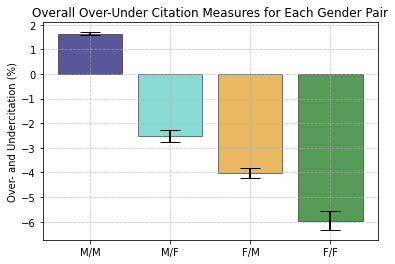

In [770]:
# Figure 2 (bottom)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) & (model_data['total_author_cites']>=11)]

n_bootstrap=1000

gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig2_bottom', 'expected_df_fig2_bottom', n_bootstrap=n_bootstrap)

delta = bootstrap_df[['M/M_bootstrap_vals', 'M/F_bootstrap_vals',
                             'F/M_bootstrap_vals','F/F_bootstrap_vals']]
observed_df = model_data[['M/M', 'M/F','F/M','F/F']].reset_index(drop=True)


se_means = np.std(delta)
conf_ints = 1.96*se_means/(n_bootstrap ** 0.5)


mm_confidence_interval = conf_ints[0]
mf_confidence_interval = conf_ints[1]
fm_confidence_interval = conf_ints[2]
ff_confidence_interval = conf_ints[3]

fig_plotted('fig2_bottom',delta, conf_ints)

<ipython-input-767-69f324e7d923>:26: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (3.5201506677285885, 3.5961167117017196)
p-value: 6.392280482714341e-09


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-4.704441380835747, -4.336396153189459)
p-value: 0.1278783646274484


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-8.978623600366744, -8.68517342555832)
p-value: 0.00019084799788715578


Bootstrapping: 100%|██████████| 1000/1000 [04:14<00:00,  3.93it/s]


95% Confidence Interval: (-20.53227430025697, -19.907214374626218)
p-value: 6.072896216435808e-05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


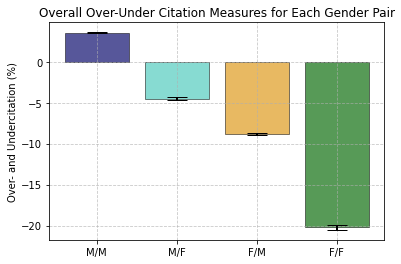

In [772]:
# Figure 3 (MM)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) & (model_data['Gender']=='M/M')]

n_bootstrap = 1000

gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig3_MM', 'expected_df_fig3_MM', n_bootstrap=n_bootstrap)

delta = bootstrap_df[['M/M_bootstrap_vals', 'M/F_bootstrap_vals',
                             'F/M_bootstrap_vals','F/F_bootstrap_vals']]


se_means = np.std(delta)
conf_ints = 1.96*se_means/(n_bootstrap ** 0.5)


mm_confidence_interval = conf_ints[0]
mf_confidence_interval = conf_ints[1]
fm_confidence_interval = conf_ints[2]
ff_confidence_interval = conf_ints[3]

fig_plotted('fig3_MM',delta,conf_ints)

<ipython-input-767-69f324e7d923>:26: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-2.405299860597287, -2.3210854530946623)
p-value: 0.0005041261255864793


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-0.015866918128971008, 0.3294956584364616)
p-value: 0.955114357357417


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (4.719641443387535, 4.963733948221825)
p-value: 0.013939084168761662


Bootstrapping: 100%|██████████| 1000/1000 [03:55<00:00,  4.25it/s]


95% Confidence Interval: (12.352133587263252, 12.782100934516555)
p-value: 0.00029103745038594475


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


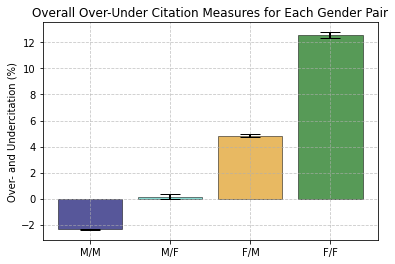

In [774]:
# Figure 3 (Everyone Else)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) & (model_data['Gender']!='M/M')]

n_bootstrap = 1000

gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig3_everyone_else', 'expected_df_fig3_everyone_else', n_bootstrap=n_bootstrap)

delta = bootstrap_df[['M/M_bootstrap_vals', 'M/F_bootstrap_vals',
                             'F/M_bootstrap_vals','F/F_bootstrap_vals']]


se_means = np.std(delta)
conf_ints = 1.96*se_means/(n_bootstrap ** 0.5)


mm_confidence_interval = conf_ints[0]
mf_confidence_interval = conf_ints[1]
fm_confidence_interval = conf_ints[2]
ff_confidence_interval = conf_ints[3]


fig_plotted('fig3_everyone_else',delta, conf_ints)

<ipython-input-767-69f324e7d923>:26: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:59,  5.57it/s]

95% Confidence Interval: (-0.9216384767359685, -0.8407947538448995)
p-value: 0.17662858193493247


Bootstrapping:   0%|          | 1/1000 [00:00<03:02,  5.48it/s]

95% Confidence Interval: (-1.1780989020648192, -0.8361887957534497)
p-value: 0.7150029985024005


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (2.015500980809398, 2.2695421869171404)
p-value: 0.2958107679741182


Bootstrapping: 100%|██████████| 1000/1000 [03:01<00:00,  5.50it/s]


95% Confidence Interval: (5.744218417218778, 6.207491765168222)
p-value: 0.10982032039121581


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


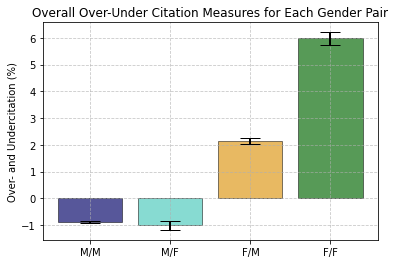

In [775]:
# Figure 3 (MF)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) & (model_data['Gender']=='M/F')]

n_bootstrap = 1000
gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig3_MF', 'expected_df_fig3_MF', n_bootstrap=n_bootstrap)

delta = bootstrap_df[['M/M_bootstrap_vals', 'M/F_bootstrap_vals',
                             'F/M_bootstrap_vals','F/F_bootstrap_vals']]


se_means = np.std(delta)
conf_ints = 1.96*se_means/(n_bootstrap ** 0.5)


mm_confidence_interval = conf_ints[0]
mf_confidence_interval = conf_ints[1]
fm_confidence_interval = conf_ints[2]
ff_confidence_interval = conf_ints[3]

fig_plotted('fig3_MF',delta, conf_ints)

<ipython-input-767-69f324e7d923>:26: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<03:07,  5.33it/s]

95% Confidence Interval: (-0.5441865041312826, -0.45649158848007093)
p-value: 0.479408002290195


Bootstrapping:   0%|          | 1/1000 [00:00<03:09,  5.27it/s]

95% Confidence Interval: (-2.2229901524894804, -1.8458312282322997)
p-value: 0.5037173362524427


Bootstrapping:   0%|          | 1/1000 [00:00<03:11,  5.23it/s]

95% Confidence Interval: (0.8068758593052409, 1.0664265439257221)
p-value: 0.6546265789493322


Bootstrapping: 100%|██████████| 1000/1000 [03:13<00:00,  5.17it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


95% Confidence Interval: (7.337672731084922, 7.793280998569093)
p-value: 0.03955129480310893


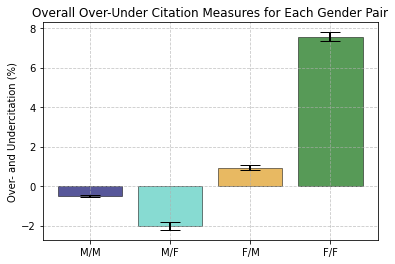

In [776]:
# Figure 3 (FM)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) & (model_data['Gender']=='F/M')]

n_bootstrap=1000
gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig3_FM', 'expected_df_fig3_FM', n_bootstrap=n_bootstrap)

delta = bootstrap_df[['M/M_bootstrap_vals', 'M/F_bootstrap_vals',
                             'F/M_bootstrap_vals','F/F_bootstrap_vals']]


se_means = np.std(delta)
conf_ints = 1.96*se_means/(n_bootstrap ** 0.5)


mm_confidence_interval = conf_ints[0]
mf_confidence_interval = conf_ints[1]
fm_confidence_interval = conf_ints[2]
ff_confidence_interval = conf_ints[3]

fig_plotted('fig3_FM',delta, conf_ints)

<ipython-input-767-69f324e7d923>:26: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:59,  5.57it/s]

95% Confidence Interval: (-12.293819588805977, -12.194979154097606)
p-value: 0.0


Bootstrapping:   0%|          | 1/1000 [00:00<02:55,  5.70it/s]

95% Confidence Interval: (7.458582581631546, 7.796006484105744)
p-value: 0.005077406780434224


Bootstrapping:   0%|          | 1/1000 [00:00<03:01,  5.50it/s]

95% Confidence Interval: (18.490054903312895, 18.714320608285)
p-value: 0.0


Bootstrapping: 100%|██████████| 1000/1000 [02:58<00:00,  5.61it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


95% Confidence Interval: (32.11261527141813, 32.45174777131009)
p-value: 0.0


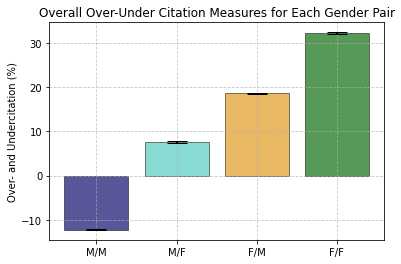

In [778]:
# Figure 3 (FF)

expected_df = pd.DataFrame(columns = ['M/M_expected', 'M/F_expected','F/M_expected','F/F_expected'])
bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F']]

model_data = model_data[(model_data['Publication Year'] >= 2006) & (model_data['Gender']=='F/F')]

n_bootstrap=1000
gam_model(model_data, bootstrap_df, expected_df, 'bootstrap_df_fig3_FF', 'expected_df_fig3_FF', n_bootstrap=n_bootstrap)

delta = bootstrap_df[['M/M_bootstrap_vals', 'M/F_bootstrap_vals',
                             'F/M_bootstrap_vals','F/F_bootstrap_vals']]


se_means = np.std(delta)
conf_ints = 1.96*se_means/(n_bootstrap ** 0.5)


mm_confidence_interval = conf_ints[0]
mf_confidence_interval = conf_ints[1]
fm_confidence_interval = conf_ints[2]
ff_confidence_interval = conf_ints[3]

fig_plotted('fig3_FF',delta,conf_ints)

In [477]:
(model_data['F/F']/model_data['Author Count']).mean()

0.08084795302297067

# Figure 4

### Beginning with the first half of Figure 4 (MM)

In [779]:
# Figure 4 (MM)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pygam import LinearGAM, s, f, PoissonGAM
from tqdm import tqdm  # For progress bar
import statistics

bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F','MM_yearly_prop','MF_yearly_prop',
                  'FM_yearly_prop','FF_yearly_prop']]
model_data = model_data[(model_data['Publication Year'].between(2006, 2023, inclusive=True))]

mm_conf_ints = []
mf_conf_ints = []
fm_conf_ints = []
ff_conf_ints = []

mm_p_vals = []
mf_p_vals = []
fm_p_vals = []
ff_p_vals = []

mm_obs_p_values = []
mf_obs_p_values = []
fm_obs_p_values = []
ff_obs_p_values = []

mm_obs_ci = []
mf_obs_ci = []
fm_obs_ci = []
ff_obs_ci = []

def fig4_gam_model(model_data, bootstrap_df, bootstrap_df_name, start_year, end_year, n_bootstrap=1000):
    
    for year in range(start_year, end_year+1):
        print(year)
        train_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F','MM_yearly_prop','MF_yearly_prop',
                  'FM_yearly_prop','FF_yearly_prop']]
        
        train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
                              
        X_train = train_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 
                            'Review_dummy_True']]
        label_encoder = LabelEncoder()
        X_train_encoded = X_train.copy()
        X_train_encoded['Journal Name'] = label_encoder.fit_transform(X_train['Journal Name'])
        X_train_encoded['Publication Month'] = label_encoder.fit_transform(X_train['Publication Month'])
        y_train = train_data['M/M']/train_data['Author Count']
        
        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']=='M/M')]



        # Define predictors and target
        X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]


        # Use LabelEncoder for categorical variables
        label_encoder = LabelEncoder()
        X_test_encoded = X_test.copy()
        X_test_encoded['Journal Name'] = label_encoder.fit_transform(X_test['Journal Name'])
        X_test_encoded['Publication Month'] = label_encoder.fit_transform(X_test['Publication Month'])


        # Number of bootstrap iterations
        n_bootstrap = n_bootstrap


        # Initialize list to store bootstrap results
        bootstrap_results = []
        observed = []
        expected = []

        ###DEFINE SAMPLES###
        n_samples = round(0.20*len(y_train))

        # Fit the GAM model on the bootstrap sample
        expected_proportions_bootstrap_list = []

        # Bootstrap loop
        for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
      
            # Sample with replacement
            X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
            X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
            y_train_bootstrap = y_train.iloc[sample_indices]
        
            gam_bootstrap = LinearGAM(s(0, n_splines=4) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)

            # Predict the probabilities for each category
            probabilities_bootstrap = gam_bootstrap.predict(X_test_encoded)

            # Calculate over- and undercitation measures
            observed_proportions = (test_data['M/M']/test_data['Author Count']).mean()
            expected_proportions_bootstrap = probabilities_bootstrap.mean()

            delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions


            # Append to bootstrap results
            bootstrap_results.append(delta_mean_percentage)
            expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)


        bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
        bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
        bootstrap_df[f'{year}_M/M_expected'] = expected_proportions_bootstrap_list

        # Calculate the 95% confidence interval
        se_means = np.std(bootstrap_results)
        mm_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))
        mm_conf_ints.append((mm_confidence_interval[1]-mm_confidence_interval[0])/2)  

        # Print the confidence interval
        print(f'95% Confidence Interval: {mm_confidence_interval}')
        mm_p_val = calculate_p_value(bootstrap_results)
        mm_p_vals.append(mm_p_val)
        print(f'p-value: {mm_p_val}')



        y_train = train_data['M/F']/train_data['Author Count']  # Assuming 'M/M' is the category to predict


        # Initialize list to store bootstrap results
        bootstrap_results = []
        observed = []
        expected = []
      
        
        
        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']=='M/M')]

        # Define predictors and target
        X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]

        # Use LabelEncoder for categorical variables
        label_encoder = LabelEncoder()
        X_test_encoded = X_test.copy()
        X_test_encoded['Journal Name'] = label_encoder.fit_transform(X_test['Journal Name'])
        X_test_encoded['Publication Month'] = label_encoder.fit_transform(X_test['Publication Month'])
        
        
        expected_proportions_bootstrap_list = []

        # Bootstrap loop
        for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
            X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
            y_train_bootstrap = y_train.iloc[sample_indices]
            gam_bootstrap = LinearGAM(s(0, n_splines=4) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)

            # Predict the probabilities for each category
            probabilities_bootstrap = gam_bootstrap.predict(X_test_encoded)

            # Calculate over- and undercitation measures
            observed_proportions = (test_data['M/F']/test_data['Author Count']).mean()
            expected_proportions_bootstrap = probabilities_bootstrap.mean()

            delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions


            # Append to bootstrap results
            bootstrap_results.append(delta_mean_percentage)
            expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)

            # Append to bootstrap results
          
            observed.append(observed_proportions)
            expected.append(expected_proportions_bootstrap)
      
        bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
        bootstrap_df[f'{year}_M/F_observed'] = observed
        bootstrap_df[f'{year}_M/F_expected'] = expected_proportions_bootstrap_list

        # Calculate the 95% confidence interval
        se_means = np.std(bootstrap_results)
        mf_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))
        mf_conf_ints.append((mf_confidence_interval[1]-mf_confidence_interval[0])/2) 

        # Print the confidence interval
        print(f'95% Confidence Interval: {mf_confidence_interval}')
        mf_p_val = calculate_p_value(bootstrap_results)
        mf_p_vals.append(mf_p_val)
        print(f'p-value: {mf_p_val}')





        y_train = train_data['F/M']/train_data['Author Count']  # Assuming 'M/M' is the category to predict
    
        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']=='M/M')]

        # Define predictors and target
        X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]


        # Use LabelEncoder for categorical variables
        label_encoder = LabelEncoder()
        X_test_encoded = X_test.copy()
        X_test_encoded['Journal Name'] = label_encoder.fit_transform(X_test['Journal Name'])
        X_test_encoded['Publication Month'] = label_encoder.fit_transform(X_test['Publication Month'])

        # Initialize list to store bootstrap results
        bootstrap_results = []
        observed = []
        expected = []
        expected_proportions_bootstrap_list = []
      


        # Bootstrap loop
        for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
         
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
            X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
            y_train_bootstrap = y_train.iloc[sample_indices]
            gam_bootstrap = LinearGAM(s(0, n_splines=4) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)

            
            # Predict the probabilities for each category
            probabilities_bootstrap = gam_bootstrap.predict(X_test_encoded)

            # Calculate over- and undercitation measures
            observed_proportions = (test_data['F/M']/test_data['Author Count']).mean()
            expected_proportions_bootstrap = probabilities_bootstrap.mean()

            delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions


            # Append to bootstrap results
            bootstrap_results.append(delta_mean_percentage)
            expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)

            # Append to bootstrap results
            observed.append(observed_proportions)
            expected.append(expected_proportions_bootstrap)


        bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
        bootstrap_df[f'{year}_F/M_observed'] = observed
        bootstrap_df[f'{year}_F/M_expected'] = expected_proportions_bootstrap_list
    
    
        se_means = np.std(bootstrap_results)
        fm_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))
        fm_conf_ints.append((fm_confidence_interval[1]-fm_confidence_interval[0])/2) 
        # Print the confidence interval
        print(f'95% Confidence Interval: {fm_confidence_interval}')
        fm_p_val = calculate_p_value(bootstrap_results)
        fm_p_vals.append(fm_p_val)
        print(f'p-value: {fm_p_val}')



      
        # Initialize list to store bootstrap results
        bootstrap_results = []
        observed = []
        expected = []
        expected_proportions_bootstrap_list = []
        
        y_train = train_data['F/F']/train_data['Author Count']
    
    
        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']=='M/M')]

        # Define predictors and target
        X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]


        # Use LabelEncoder for categorical variables
        label_encoder = LabelEncoder()
        X_test_encoded = X_test.copy()
        X_test_encoded['Journal Name'] = label_encoder.fit_transform(X_test['Journal Name'])
        X_test_encoded['Publication Month'] = label_encoder.fit_transform(X_test['Publication Month'])

        # Bootstrap loop
        for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
    
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
            X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
            y_train_bootstrap = y_train.iloc[sample_indices]
            gam_bootstrap = LinearGAM(s(0, n_splines=4) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)


            # Predict the probabilities for each category
            probabilities_bootstrap = gam_bootstrap.predict(X_test_encoded)

            # Calculate over- and undercitation measures
            observed_proportions = (test_data['F/F']/test_data['Author Count']).mean()
            expected_proportions_bootstrap = probabilities_bootstrap.mean()

            delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions


            # Append to bootstrap results
            bootstrap_results.append(delta_mean_percentage)
            expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)

            # Append to bootstrap results
            observed.append(observed_proportions)
            expected.append(expected_proportions_bootstrap)
            
        bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
        bootstrap_df[f'{year}_F/F_observed'] = observed
        bootstrap_df[f'{year}_F/F_expected'] = expected_proportions_bootstrap_list
    
        # Calculate the 95% confidence interval
        se_means = np.std(bootstrap_results)
        ff_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))
        ff_conf_ints.append((ff_confidence_interval[1]-ff_confidence_interval[0])/2) 
        # Print the confidence interval
        print(f'95% Confidence Interval: {ff_confidence_interval}')
        ff_p_val = calculate_p_value(bootstrap_results)
        ff_p_vals.append(ff_p_val)
        print(f'p-value: {ff_p_val}')
    
    
      
        
        
        
        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']=='M/M')]
        n_bootstraped = 1000
        observed_values = test_data['M/M']/test_data['Author Count']
        # Bootstrap resampling
        bootstrap_samples = np.random.choice(observed_values, size=(len(observed_values), n_bootstrap), replace=True)
        # Calculate the mean for each bootstrap sample
        bootstrap_means = np.mean(bootstrap_samples, axis=0)
        # Calculate the 95% confidence interval
        mm_obs_ci.append(np.percentile(bootstrap_means, [2.5, 97.5]))
        mm_obs_p_val = calculate_p_value(bootstrap_samples)
        mm_obs_p_values.append(mm_obs_p_val)

        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']=='M/M')]
        n_bootstraped = 1000
        observed_values = test_data['M/F']/test_data['Author Count']
        # Bootstrap resampling
        bootstrap_samples = np.random.choice(observed_values, size=(len(observed_values), n_bootstrap), replace=True)
        # Calculate the mean for each bootstrap sample
        bootstrap_means = np.mean(bootstrap_samples, axis=0)
        # Calculate the 95% confidence interval
        mf_obs_ci.append(np.percentile(bootstrap_means, [2.5, 97.5]))
        mf_obs_p_val = calculate_p_value(bootstrap_samples)
        mf_obs_p_values.append(mf_obs_p_val)



        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']=='M/M')]
        n_bootstraped = 1000
        observed_values = test_data['F/M']/test_data['Author Count']
        # Bootstrap resampling
        bootstrap_samples = np.random.choice(observed_values, size=(len(observed_values), n_bootstrap), replace=True)
        # Calculate the mean for each bootstrap sample
        bootstrap_means = np.mean(bootstrap_samples, axis=0)
        # Calculate the 95% confidence interval
        fm_obs_ci.append(np.percentile(bootstrap_means, [2.5, 97.5]))
        fm_obs_p_val = calculate_p_value(bootstrap_samples)
        fm_obs_p_values.append(fm_obs_p_val)
        



        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']=='M/M')]
        n_bootstraped = 1000
        observed_values = test_data['F/F']/test_data['Author Count']
        # Bootstrap resampling
        bootstrap_samples = np.random.choice(observed_values, size=(len(observed_values), n_bootstraped), replace=True)
        # Calculate the mean for each bootstrap sample
        bootstrap_means = np.mean(bootstrap_samples, axis=0)
        # Calculate the 95% confidence interval
        ff_obs_ci.append(np.percentile(bootstrap_means, [2.5, 97.5]))
        ff_obs_p_val = calculate_p_value(bootstrap_samples)
        ff_obs_p_values.append(ff_obs_p_val)
    
        bootstrap_df.to_csv(f'/Users/akashrathi/Desktop/BrownMed/{bootstrap_df_name}', index=False)

fig4_gam_model(model_data, bootstrap_df, 'fig4_bootstrap_df', 2007, 2023, n_bootstrap=1000)

<ipython-input-779-43c86534ee96>:16: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  model_data = model_data[(model_data['Publication Year'].between(2006, 2023, inclusive=True))]
<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:47,  5.96it/s]

2007


Bootstrapping:   0%|          | 1/1000 [00:00<02:40,  6.22it/s]

95% Confidence Interval: (1.4758715295435325, 1.7105624346152515)
p-value: 0.40005636865241745


Bootstrapping:   0%|          | 1/1000 [00:00<02:56,  5.66it/s]

95% Confidence Interval: (-24.665307001256796, -22.499287316578783)
p-value: 0.17713963084133333


Bootstrapping:   0%|          | 1/1000 [00:00<02:48,  5.91it/s]

95% Confidence Interval: (16.734048414134943, 18.398501289309966)
p-value: 0.19078495973136356


Bootstrapping: 100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s]
<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-87.14419939816841, -81.73121710903413)
p-value: 0.05315177605403232
2008


Bootstrapping:   0%|          | 1/1000 [00:00<02:52,  5.80it/s]

95% Confidence Interval: (5.450415124138219, 5.6503799886165424)
p-value: 0.0005800474158494939


Bootstrapping:   0%|          | 1/1000 [00:00<02:59,  5.55it/s]

95% Confidence Interval: (-62.91622976213265, -60.66904512038965)
p-value: 0.0006528211892942171


Bootstrapping:   0%|          | 1/1000 [00:00<02:43,  6.12it/s]

95% Confidence Interval: (-11.217020584394838, -9.547004504932207)
p-value: 0.440925167285773


Bootstrapping: 100%|██████████| 1000/1000 [02:54<00:00,  5.74it/s]
<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-37.2081570433794, -33.85382206238371)
p-value: 0.18916031965029
2009


Bootstrapping:   0%|          | 1/1000 [00:00<02:57,  5.63it/s]

95% Confidence Interval: (4.411776814007251, 4.565236153557263)
p-value: 0.00028815431622741805


Bootstrapping:   0%|          | 1/1000 [00:00<02:58,  5.60it/s]

95% Confidence Interval: (-27.89451710484785, -26.650820686133805)
p-value: 0.006561590658254346


Bootstrapping:   0%|          | 1/1000 [00:00<02:53,  5.76it/s]

95% Confidence Interval: (-15.206241207203096, -14.218346706897808)
p-value: 0.06487727296175305


Bootstrapping: 100%|██████████| 1000/1000 [02:46<00:00,  6.00it/s]


95% Confidence Interval: (-21.157336747405942, -19.182627949903143)
p-value: 0.20545587303954171
2010


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:56,  5.66it/s]

95% Confidence Interval: (2.9739439963527374, 3.107117058630215)
p-value: 0.004651709318031827


Bootstrapping:   0%|          | 1/1000 [00:00<02:55,  5.70it/s]

95% Confidence Interval: (-5.678557127724178, -4.841804321320782)
p-value: 0.43581899451542405


Bootstrapping:   0%|          | 1/1000 [00:00<02:55,  5.68it/s]

95% Confidence Interval: (-7.402749010720207, -6.688145639630177)
p-value: 0.22164551715789926


Bootstrapping: 100%|██████████| 1000/1000 [02:44<00:00,  6.08it/s]


95% Confidence Interval: (-54.64813933885464, -52.54211762111725)
p-value: 0.001607013299067983
2011


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:49,  5.88it/s]

95% Confidence Interval: (4.931707871504494, 5.050927212842084)
p-value: 2.1046702225469005e-07


Bootstrapping:   0%|          | 1/1000 [00:00<02:42,  6.15it/s]

95% Confidence Interval: (-12.770387091074412, -12.015941685232367)
p-value: 0.041720852530259034


Bootstrapping:   0%|          | 1/1000 [00:00<02:40,  6.24it/s]

95% Confidence Interval: (-30.32749416082576, -29.59488437875142)
p-value: 3.9868423296063327e-07


Bootstrapping: 100%|██████████| 1000/1000 [02:41<00:00,  6.21it/s]


95% Confidence Interval: (-2.523042632577885, -1.3730140860727293)
p-value: 0.8336852488175981
2012


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:42,  6.16it/s]

95% Confidence Interval: (2.8743966564526304, 2.983371539759242)
p-value: 0.000863268839568887


Bootstrapping:   0%|          | 1/1000 [00:00<02:41,  6.18it/s]

95% Confidence Interval: (3.388771669462197, 3.9605862920199675)
p-value: 0.4256728138096837


Bootstrapping:   0%|          | 1/1000 [00:00<02:38,  6.30it/s]

95% Confidence Interval: (-19.098835258401717, -18.516439858360823)
p-value: 6.250339141167238e-05


Bootstrapping: 100%|██████████| 1000/1000 [02:43<00:00,  6.11it/s]


95% Confidence Interval: (-14.752417404641283, -13.643219218234654)
p-value: 0.11257753608101218
2013


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:38,  6.32it/s]

95% Confidence Interval: (3.3550224124877857, 3.46603430840026)
p-value: 0.00013989043291862124


Bootstrapping:   0%|          | 1/1000 [00:00<02:38,  6.31it/s]

95% Confidence Interval: (-2.0689697417811685, -1.4882039820850013)
p-value: 0.704220335998657


Bootstrapping:   0%|          | 1/1000 [00:00<02:38,  6.29it/s]

95% Confidence Interval: (-9.19586171192488, -8.694609334551977)
p-value: 0.02695389956853611


Bootstrapping: 100%|██████████| 1000/1000 [02:40<00:00,  6.21it/s]


95% Confidence Interval: (-44.64818828685508, -43.38689817060716)
p-value: 1.5177034832447589e-05


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:39,  6.28it/s]

2014


Bootstrapping:   0%|          | 1/1000 [00:00<03:01,  5.50it/s]

95% Confidence Interval: (2.9550894197347164, 3.0640852622717274)
p-value: 0.0006197685469713221


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-10.221920434070995, -9.617534223217373)
p-value: 0.04189481066458711


Bootstrapping:   0%|          | 1/1000 [00:00<02:37,  6.33it/s]

95% Confidence Interval: (-6.398709996588167, -5.96784553038033)
p-value: 0.07524768932209902


Bootstrapping: 100%|██████████| 1000/1000 [02:41<00:00,  6.20it/s]


95% Confidence Interval: (-13.730915718032236, -12.740117101262683)
p-value: 0.09773631049066589


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

2015


Bootstrapping:   0%|          | 1/1000 [00:00<02:38,  6.31it/s]

95% Confidence Interval: (4.274609207965009, 4.377521748989226)
p-value: 1.879496447365625e-07


Bootstrapping: 100%|██████████| 1000/1000 [02:45<00:00,  6.04it/s]
<ipython-input-779-43c86534ee96>:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-779-43c86534ee96>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-12.094645100420275, -11.537893382469958)
p-value: 0.008515827232747242


Bootstrapping: 100%|██████████| 1000/1000 [02:41<00:00,  6.17it/s]
<ipython-input-779-43c86534ee96>:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:253: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-779-43c86534ee96>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-13.34395035997784, -12.91626838120874)
p-value: 0.00014140915545146626


Bootstrapping: 100%|██████████| 1000/1000 [02:42<00:00,  6.17it/s]
<ipython-input-779-43c86534ee96>:318: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:319: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-779-43c86534ee96>:320: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-10.101420943341001, -9.245157421048528)
p-value: 0.1613929011753401


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:46,  6.01it/s]

2016


Bootstrapping: 100%|██████████| 1000/1000 [02:43<00:00,  6.11it/s]
<ipython-input-779-43c86534ee96>:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-779-43c86534ee96>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (3.194487597440422, 3.300955091123684)
p-value: 0.00015597518325805027


Bootstrapping: 100%|██████████| 1000/1000 [02:40<00:00,  6.22it/s]
<ipython-input-779-43c86534ee96>:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-779-43c86534ee96>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-7.742031582005013, -7.246343573478385)
p-value: 0.06091102225213252


Bootstrapping: 100%|██████████| 1000/1000 [02:41<00:00,  6.18it/s]
<ipython-input-779-43c86534ee96>:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:253: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-779-43c86534ee96>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-7.248740080038368, -6.84940182341814)
p-value: 0.02865869935047405


Bootstrapping: 100%|██████████| 1000/1000 [02:42<00:00,  6.17it/s]
<ipython-input-779-43c86534ee96>:318: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:319: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-779-43c86534ee96>:320: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-14.183193782316547, -13.352371232507423)
p-value: 0.03995676700434592


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:26,  6.80it/s]

2017


Bootstrapping: 100%|██████████| 1000/1000 [02:40<00:00,  6.23it/s]
<ipython-input-779-43c86534ee96>:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-779-43c86534ee96>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (4.8954458925224085, 5.0020203093994535)
p-value: 8.608748824912027e-09


Bootstrapping: 100%|██████████| 1000/1000 [02:42<00:00,  6.14it/s]
<ipython-input-779-43c86534ee96>:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-779-43c86534ee96>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-4.8263567871390265, -4.36708247386702)
p-value: 0.21472172125203137


Bootstrapping: 100%|██████████| 1000/1000 [02:42<00:00,  6.16it/s]
<ipython-input-779-43c86534ee96>:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:253: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-779-43c86534ee96>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-16.536177434554666, -16.147587312342296)
p-value: 1.857066971311383e-07


Bootstrapping: 100%|██████████| 1000/1000 [02:43<00:00,  6.13it/s]
<ipython-input-779-43c86534ee96>:318: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:319: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-779-43c86534ee96>:320: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-20.087602177198235, -19.30452797503778)
p-value: 0.0018214264660305624


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:32,  6.57it/s]

2018


Bootstrapping: 100%|██████████| 1000/1000 [02:47<00:00,  5.97it/s]
<ipython-input-779-43c86534ee96>:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-779-43c86534ee96>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (2.4297863673781466, 2.5314328755052182)
p-value: 0.002484805800809342


Bootstrapping: 100%|██████████| 1000/1000 [02:42<00:00,  6.15it/s]
<ipython-input-779-43c86534ee96>:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-779-43c86534ee96>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-3.5423080102156206, -3.08726672837913)
p-value: 0.3665223703696405


Bootstrapping: 100%|██████████| 1000/1000 [02:42<00:00,  6.17it/s]
<ipython-input-779-43c86534ee96>:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:253: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-779-43c86534ee96>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-4.779000556753368, -4.4306996946455035)
p-value: 0.1012383622417965


Bootstrapping: 100%|██████████| 1000/1000 [02:43<00:00,  6.13it/s]
<ipython-input-779-43c86534ee96>:318: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:319: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-779-43c86534ee96>:320: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-13.886958931920974, -13.190494787582404)
p-value: 0.01596511994969463


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:35,  6.42it/s]

2019


Bootstrapping: 100%|██████████| 1000/1000 [02:42<00:00,  6.16it/s]
<ipython-input-779-43c86534ee96>:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-779-43c86534ee96>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (4.436046965360155, 4.5316419540371955)
p-value: 6.086843473696035e-09


Bootstrapping: 100%|██████████| 1000/1000 [02:43<00:00,  6.13it/s]
<ipython-input-779-43c86534ee96>:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-779-43c86534ee96>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-2.0690530247314873, -1.6890195688150982)
p-value: 0.5399333328292226


Bootstrapping: 100%|██████████| 1000/1000 [02:42<00:00,  6.16it/s]
<ipython-input-779-43c86534ee96>:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:253: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-779-43c86534ee96>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-14.94295454348232, -14.612805838405182)
p-value: 2.87856931624475e-08


Bootstrapping: 100%|██████████| 1000/1000 [02:41<00:00,  6.17it/s]
<ipython-input-779-43c86534ee96>:318: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:319: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-779-43c86534ee96>:320: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-13.13542741466436, -12.52238861972366)
p-value: 0.00948371089577793


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:25,  6.87it/s]

2020


Bootstrapping: 100%|██████████| 1000/1000 [02:41<00:00,  6.20it/s]
<ipython-input-779-43c86534ee96>:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-779-43c86534ee96>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (1.9668263025796102, 2.065931339674247)
p-value: 0.011665622466592529


Bootstrapping: 100%|██████████| 1000/1000 [02:42<00:00,  6.17it/s]
<ipython-input-779-43c86534ee96>:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-779-43c86534ee96>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (7.893034300899237, 8.240950832188219)
p-value: 0.0040500421620282


Bootstrapping: 100%|██████████| 1000/1000 [02:41<00:00,  6.17it/s]
<ipython-input-779-43c86534ee96>:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:253: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-779-43c86534ee96>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-7.276203998453982, -6.965271947763102)
p-value: 0.004527352746645841


Bootstrapping: 100%|██████████| 1000/1000 [02:42<00:00,  6.17it/s]
<ipython-input-779-43c86534ee96>:318: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:319: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-779-43c86534ee96>:320: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-23.74988795133392, -23.080680499749942)
p-value: 1.4420915769530751e-05


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:30,  6.63it/s]

2021


Bootstrapping: 100%|██████████| 1000/1000 [02:42<00:00,  6.15it/s]
<ipython-input-779-43c86534ee96>:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-779-43c86534ee96>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (1.5273882038189943, 1.6402578250704152)
p-value: 0.081953035860022


Bootstrapping: 100%|██████████| 1000/1000 [02:44<00:00,  6.08it/s]
<ipython-input-779-43c86534ee96>:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-779-43c86534ee96>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (0.9565576898193724, 1.3430542700332122)
p-value: 0.7122932232577122


Bootstrapping: 100%|██████████| 1000/1000 [02:41<00:00,  6.20it/s]
<ipython-input-779-43c86534ee96>:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:253: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-779-43c86534ee96>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-2.7878563506272624, -2.4803605126194372)
p-value: 0.2882845789455184


Bootstrapping: 100%|██████████| 1000/1000 [02:44<00:00,  6.09it/s]
<ipython-input-779-43c86534ee96>:318: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:319: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-779-43c86534ee96>:320: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-12.82124588967361, -12.159000702088575)
p-value: 0.019390187685282


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:25,  6.86it/s]

2022


Bootstrapping: 100%|██████████| 1000/1000 [02:43<00:00,  6.12it/s]
<ipython-input-779-43c86534ee96>:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-779-43c86534ee96>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (2.1843354577796976, 2.3140026407863417)
p-value: 0.03153969877536422


Bootstrapping: 100%|██████████| 1000/1000 [02:44<00:00,  6.09it/s]
<ipython-input-779-43c86534ee96>:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-779-43c86534ee96>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-2.678898993091193, -2.1887862484941265)
p-value: 0.5381735680126951


Bootstrapping: 100%|██████████| 1000/1000 [02:43<00:00,  6.11it/s]
<ipython-input-779-43c86534ee96>:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:253: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-779-43c86534ee96>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-0.7607265565004131, -0.4203113643803645)
p-value: 0.8297393255838641


Bootstrapping: 100%|██████████| 1000/1000 [02:43<00:00,  6.11it/s]
<ipython-input-779-43c86534ee96>:318: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:319: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-779-43c86534ee96>:320: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-18.79649018168292, -18.02500962881411)
p-value: 0.0030940688920739756


<ipython-input-779-43c86534ee96>:48: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2006, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:25,  6.87it/s]

2023


Bootstrapping: 100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s]
<ipython-input-779-43c86534ee96>:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-779-43c86534ee96>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (4.126468217456165, 4.290351859380002)
p-value: 0.0014564007034849613


Bootstrapping: 100%|██████████| 1000/1000 [02:48<00:00,  5.93it/s]
<ipython-input-779-43c86534ee96>:182: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-779-43c86534ee96>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-0.356357415338587, 0.22115780666712115)
p-value: 0.9884230837257468


Bootstrapping: 100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s]
<ipython-input-779-43c86534ee96>:252: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:253: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-779-43c86534ee96>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-3.993080745990749, -3.5422436719321)
p-value: 0.30022590485623857


Bootstrapping: 100%|██████████| 1000/1000 [02:51<00:00,  5.83it/s]
<ipython-input-779-43c86534ee96>:318: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-779-43c86534ee96>:319: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-779-43c86534ee96>:320: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-40.63102958197265, -39.59106648049603)
p-value: 1.7429737630969555e-06


In [780]:

        
MM_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'M/M_bootstrap' in col:
    MM_bootstrap_vals.append(bootstrap_df[col].mean())
MM_bootstrap_vals = [x for x in MM_bootstrap_vals if str(x) != 'nan']
#MM_errors = np.std(MM_bootstrap_vals, axis=0) / np.sqrt(len(MM_bootstrap_vals))


MF_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'M/F_bootstrap' in col:
    MF_bootstrap_vals.append(bootstrap_df[col].mean())
MF_bootstrap_vals = [x for x in MF_bootstrap_vals if str(x) != 'nan']
#MF_errors = np.std(MF_bootstrap_vals, axis=0) / np.sqrt(len(MF_bootstrap_vals))

FM_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'F/M_bootstrap' in col:
    FM_bootstrap_vals.append(bootstrap_df[col].mean())
FM_bootstrap_vals = [x for x in FM_bootstrap_vals if str(x) != 'nan']
#FM_errors = np.std(FM_bootstrap_vals, axis=0) / np.sqrt(len(FM_bootstrap_vals))

FF_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'F/F_bootstrap' in col:
    FF_bootstrap_vals.append(bootstrap_df[col].mean())
FF_bootstrap_vals = [x for x in FF_bootstrap_vals if str(x) != 'nan']
#FF_errors = np.std(FF_bootstrap_vals, axis=0) / np.sqrt(len(FF_bootstrap_vals))





MM_expected_vals = []
for col in bootstrap_df.columns:
  if 'M/M_expected' in col:
    MM_expected_vals.append(bootstrap_df[col].mean())
MM_expected_vals = [x for x in MM_expected_vals if str(x) != 'nan']
#MM_errors = np.std(MM_bootstrap_vals, axis=0) / np.sqrt(len(MM_bootstrap_vals))


MF_expected_vals = []
for col in bootstrap_df.columns:
  if 'M/F_expected' in col:
    MF_expected_vals.append(bootstrap_df[col].mean())
MF_expected_vals = [x for x in MF_expected_vals if str(x) != 'nan']
#MF_errors = np.std(MF_bootstrap_vals, axis=0) / np.sqrt(len(MF_bootstrap_vals))

FM_expected_vals = []
for col in bootstrap_df.columns:
  if 'F/M_expected' in col:
    FM_expected_vals.append(bootstrap_df[col].mean())
FM_expected_vals = [x for x in FM_expected_vals if str(x) != 'nan']
#FM_errors = np.std(FM_bootstrap_vals, axis=0) / np.sqrt(len(FM_bootstrap_vals))

FF_expected_vals = []
for col in bootstrap_df.columns:
  if 'F/F_expected' in col:
    FF_expected_vals.append(bootstrap_df[col].mean())
FF_expected_vals = [x for x in FF_expected_vals if str(x) != 'nan']
#FF_errors = np.std(FF_bootstrap_vals, axis=0) / np.sqrt(len(FF_bootstrap_vals))




MM_observed_vals = []
for col in bootstrap_df.columns:
  if 'M/M_observed' in col:
    MM_observed_vals.append(bootstrap_df[col].mean())
MM_observed_vals = [x for x in MM_observed_vals if str(x) != 'nan']
#MM_errors = np.std(MM_bootstrap_vals, axis=0) / np.sqrt(len(MM_bootstrap_vals))


MF_observed_vals = []
for col in bootstrap_df.columns:
  if 'M/F_observed' in col:
    MF_observed_vals.append(bootstrap_df[col].mean())
MF_observed_vals = [x for x in MF_observed_vals if str(x) != 'nan']
#MF_errors = np.std(MF_bootstrap_vals, axis=0) / np.sqrt(len(MF_bootstrap_vals))

FM_observed_vals = []
for col in bootstrap_df.columns:
  if 'F/M_observed' in col:
    FM_observed_vals.append(bootstrap_df[col].mean())
FM_observed_vals = [x for x in FM_observed_vals if str(x) != 'nan']
#FM_errors = np.std(FM_bootstrap_vals, axis=0) / np.sqrt(len(FM_bootstrap_vals))

FF_observed_vals = []
for col in bootstrap_df.columns:
  if 'F/F_observed' in col:
    FF_observed_vals.append(bootstrap_df[col].mean())
FF_observed_vals = [x for x in FF_observed_vals if str(x) != 'nan']


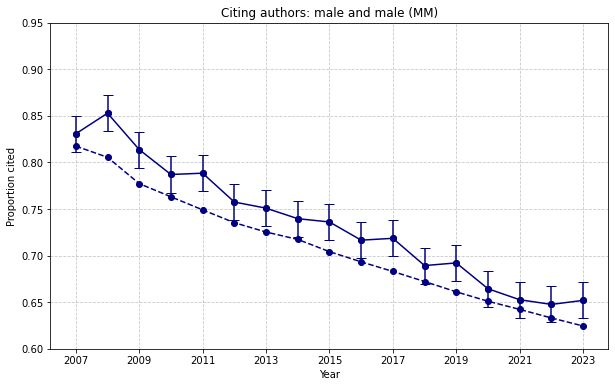

In [781]:
import matplotlib.pyplot as plt

mm_obs_ci_error = []
for i in mm_obs_ci:
    mm_obs_ci_error.append((np.diff(i)/2)[0])

# Years from 2006 to 2023
years = list(range(2007, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MM_observed_vals, label='M/M', marker='o', color = 'navy')
plt.plot(years, MM_expected_vals, label='M/M', marker='o', color = 'navy', linestyle='--')

plt.errorbar(years, MM_observed_vals, yerr=np.mean(mm_obs_ci_error), label='M/M', marker='o', linestyle='', capsize=5, color = 'navy')
#plt.errorbar(years, MM_expected_vals, yerr=mm_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim()
plt.xlabel('Year')
plt.ylabel('Proportion cited')
plt.title('Citing authors: male and male (MM)')
plt.ylim(0.60,0.95)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_MandM', format='pdf')

# Show the plot
plt.show()

In [782]:
print('observed slope CI:',(np.polyfit(years, MM_observed_vals, 1)[0]-np.mean(mm_obs_ci_error),
                           np.polyfit(years, MM_observed_vals, 1)[0]+np.mean(mm_obs_ci_error)))
print('observed slope p-value:',np.mean(mm_obs_p_values))
print('\n')
print('expected slope:',(np.polyfit(years, MM_expected_vals, 1)[0]))

observed slope CI: (-0.031912485612186764, 0.006793769395815854)
observed slope p-value: 0.013874796016679037


expected slope: -0.011693647889457775


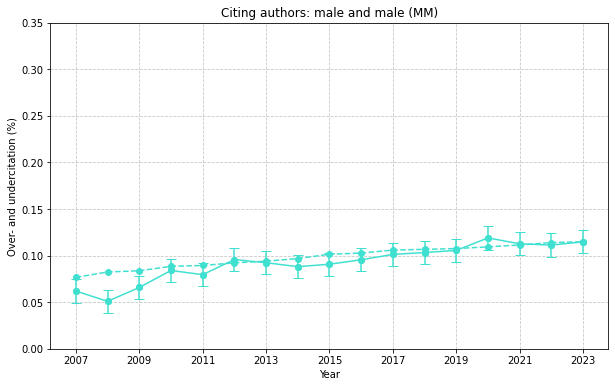

In [783]:
import matplotlib.pyplot as plt

mf_obs_ci_error = []
for i in mf_obs_ci:
    mf_obs_ci_error.append((np.diff(i)/2)[0])

# Years from 2006 to 2023
years = list(range(2007, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MF_observed_vals, label='M/M', marker='o', color = 'turquoise')
plt.plot(years, MF_expected_vals, label='M/M', marker='o', color = 'turquoise', linestyle='--')

plt.errorbar(years, MF_observed_vals, yerr=np.mean(mf_obs_ci_error), label='M/M', marker='o', linestyle='', capsize=5, color = 'turquoise')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-1,1)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
plt.ylim(0,0.35)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_MandF', format='pdf')

# Show the plot
plt.show()

In [784]:
print('observed slope CI:',(np.polyfit(years, MF_observed_vals, 1)[0]-np.mean(mf_obs_ci_error),
                           np.polyfit(years, MF_observed_vals, 1)[0]+np.mean(mf_obs_ci_error)))
print('observed slope p-value:',np.mean(mf_obs_p_values))
print('\n')
print('expected slope:',(np.polyfit(years, MF_expected_vals, 1)[0]))

observed slope CI: (-0.008899250829964362, 0.016020406732600013)
observed slope p-value: 0.62778675818478


expected slope: 0.002311831387465539


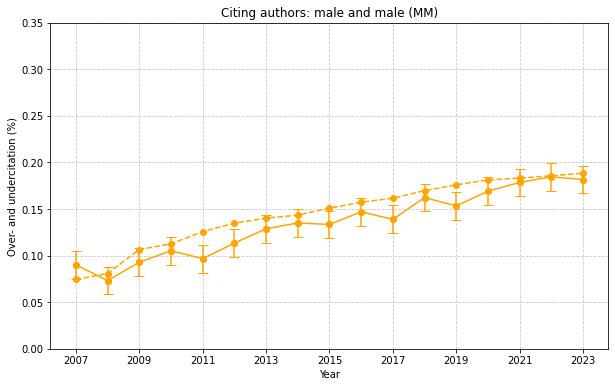

In [785]:
import matplotlib.pyplot as plt

fm_obs_ci_error = []
for i in fm_obs_ci:
    fm_obs_ci_error.append((np.diff(i)/2)[0])

# Years from 2006 to 2023
years = list(range(2007, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, FM_observed_vals, label='M/M', marker='o', color = 'orange')
plt.plot(years, FM_expected_vals, label='M/M', marker='o', color = 'orange', linestyle='--')

plt.errorbar(years, FM_observed_vals, yerr=np.mean(fm_obs_ci_error), label='M/M', marker='o', linestyle='', capsize=5, color = 'orange')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-1,1)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
plt.ylim(0,0.35)


plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_FandM', format='pdf')

# Show the plot
plt.show()

In [786]:
print('observed slope CI:',(np.polyfit(years, FM_observed_vals, 1)[0]-np.mean(fm_obs_ci_error),
                           np.polyfit(years, FM_observed_vals, 1)[0]+np.mean(fm_obs_ci_error)))
print('observed slope p-value:',np.mean(fm_obs_p_values))
print('\n')
print('expected slope:',(np.polyfit(years, FM_expected_vals, 1)[0]))

observed slope CI: (-0.008179319337469942, 0.02165464733839784)
observed slope p-value: 0.5504028820548961


expected slope: 0.006891699848165193


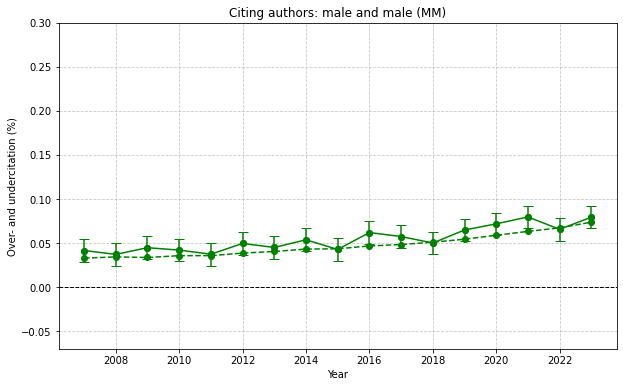

In [807]:
import matplotlib.pyplot as plt

ff_obs_ci_error = []
for i in ff_obs_ci:
    ff_obs_ci_error.append((np.diff(i)/2)[0])

# Years from 2006 to 2023
years = list(range(2007, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

plt.plot(years, FF_observed_vals, label='M/M', marker='o', color = 'green')
plt.plot(years, FF_expected_vals, label='M/M', marker='o', color = 'green', linestyle='--')

plt.errorbar(years, FF_observed_vals, yerr=np.mean(ff_obs_ci_error), label='M/M', marker='o', linestyle='', capsize=5, color = 'green')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-0.07,0.30)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_MM_FandF', format='pdf')

# Show the plot
plt.show()

In [788]:
print('observed slope CI:',(np.polyfit(years, FF_observed_vals, 1)[0]-np.mean(ff_obs_ci_error),
                           np.polyfit(years, FF_observed_vals, 1)[0]+np.mean(ff_obs_ci_error)))
print('observed slope p-value:',np.mean(ff_obs_p_values))
print('\n')
print('expected slope:',(np.polyfit(years, FF_expected_vals, 1)[0]))

observed slope CI: (-0.005644998900874186, 0.010167231213681283)
observed slope p-value: 0.7550550829401029


expected slope: 0.002472468595561797


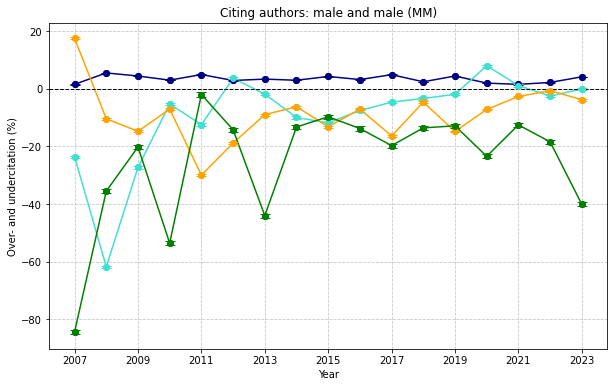

In [789]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2007, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MM_bootstrap_vals, label='M/M', marker='o', color = 'navy')
plt.plot(years, MF_bootstrap_vals, label='M/F', marker='o', color = 'turquoise')
plt.plot(years, FM_bootstrap_vals, label='F/M', marker='o', color = 'orange')
plt.plot(years, FF_bootstrap_vals, label='F/F', marker='o', color = 'green')

plt.errorbar(years, MM_bootstrap_vals, yerr=np.mean(mm_conf_ints), label='M/M', marker='o', linestyle='', capsize=5, color = 'navy')
plt.errorbar(years, MF_bootstrap_vals, yerr=np.mean(mf_conf_ints), label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')
plt.errorbar(years, FM_bootstrap_vals, yerr=np.mean(fm_conf_ints), label='F/M', marker='o', linestyle='', capsize=5, color = 'orange')
plt.errorbar(years, FF_bootstrap_vals, yerr=np.mean(ff_conf_ints), label='F/F', marker='o', linestyle='', capsize=5, color = 'green')

# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: male and male (MM)')
#plt.ylim(-9,1)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_overall_ex', format='pdf')

# Show the plot
plt.show()


In [791]:
print('MM slope CI:',(np.polyfit(years, MM_bootstrap_vals, 1)[0]-np.mean(mm_conf_ints),
                           np.polyfit(years, MM_bootstrap_vals, 1)[0]+np.mean(mm_conf_ints)))
print('MM slope p-value:',np.mean(mm_p_vals))

print('MF slope CI:',(np.polyfit(years, MF_bootstrap_vals, 1)[0]-np.mean(mf_conf_ints),
                           np.polyfit(years, MF_bootstrap_vals, 1)[0]+np.mean(mf_conf_ints)))
print('MF slope p-value:',np.mean(mf_p_vals))
print('FM slope CI:',(np.polyfit(years, FM_bootstrap_vals, 1)[0]-np.mean(fm_conf_ints),
                           np.polyfit(years, FM_bootstrap_vals, 1)[0]+np.mean(fm_conf_ints)))
print('FM slope p-value:',np.mean(fm_p_vals))
print('FF slope CI:',(np.polyfit(years, FF_bootstrap_vals, 1)[0]-np.mean(ff_conf_ints),
                           np.polyfit(years, FF_bootstrap_vals, 1)[0]+np.mean(ff_conf_ints)))
print('FF slope p-value:',np.mean(ff_p_vals))

MM slope CI: (-0.125133886068666, 0.0035844413511219794)
MM slope p-value: 0.031556185848457374
MF slope CI: (1.7177218160387429, 2.4914803693384777)
MF slope p-value: 0.3098368259589087
FM slope CI: (-0.17012210033079164, 0.4526913662217409)
FM slope p-value: 0.151371367969144
FF slope CI: (0.9475850679706006, 2.3759334655209052)
FF slope p-value: 0.10261821178971285


### Now, second half, everyone other than MM

In [792]:
test_data = model_data[(model_data['Publication Year'] == 2007) & (model_data['Gender']!='M/M')]



# Define predictors and target
X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]


# Use LabelEncoder for categorical variables
label_encoder = LabelEncoder()
X_test_encoded = X_test.copy()
X_test_encoded['Journal Name'] = label_encoder.fit_transform(X_test['Journal Name'])
X_test_encoded['Publication Month'] = label_encoder.fit_transform(X_test['Publication Month'])

X_test_encoded

,Publication Year,Author Count,Publication Month,total_author_cites,Journal Name,Review_dummy_True
1595,2007,3,5,14,5,0
1626,2007,2,10,2,7,0
1665,2007,4,4,5,7,0
1692,2007,9,5,4,0,0
2466,2007,4,5,2,6,0
...,...,...,...,...,...,...
26651,2007,2,1,3,7,0
26816,2007,1,5,2,6,0
26911,2007,3,11,3,0,0
27031,2007,2,6,37,1,0


In [795]:
# Figure 4 (other than MM)
# Figure 4 (MM)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pygam import LinearGAM, s, f, PoissonGAM
from tqdm import tqdm  # For progress bar
import statistics

bootstrap_df = pd.DataFrame(columns = ['M/M_bootstrap_vals', 'M/F_bootstrap_vals','F/M_bootstrap_vals','F/F_bootstrap_vals'])
model_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F','MM_yearly_prop','MF_yearly_prop',
                  'FM_yearly_prop','FF_yearly_prop']]
model_data = model_data[(model_data['Publication Year'].between(2007, 2023, inclusive=True))]

mm_conf_ints = []
mf_conf_ints = []
fm_conf_ints = []
ff_conf_ints = []

mm_p_vals = []
mf_p_vals = []
fm_p_vals = []
ff_p_vals = []

mm_obs_p_values = []
mf_obs_p_values = []
fm_obs_p_values = []
ff_obs_p_values = []

mm_obs_ci = []
mf_obs_ci = []
fm_obs_ci = []
ff_obs_ci = []

def fig4_gam_model(model_data, bootstrap_df, bootstrap_df_name, start_year, end_year, n_bootstrap=1000):
    
    for year in range(start_year, end_year+1):
        print(year)
        train_data = data[['Publication Year', 'Publication Month',
                   'Author Count','Review_dummy_True','Gender',
                   'total_author_cites', 'Journal Name',
                   'Article Type','M/M','M/F','F/M','F/F','MM_yearly_prop','MF_yearly_prop',
                  'FM_yearly_prop','FF_yearly_prop']]
        
        train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
                              
        X_train = train_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 
                            'Review_dummy_True']]
        label_encoder = LabelEncoder()
        X_train_encoded = X_train.copy()
        X_train_encoded['Journal Name'] = label_encoder.fit_transform(X_train['Journal Name'])
        X_train_encoded['Publication Month'] = label_encoder.fit_transform(X_train['Publication Month'])
        y_train = train_data['M/M']/train_data['Author Count']
        
        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']!='M/M')]



        # Define predictors and target
        X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]


        # Use LabelEncoder for categorical variables
        label_encoder = LabelEncoder()
        X_test_encoded = X_test.copy()
        X_test_encoded['Journal Name'] = label_encoder.fit_transform(X_test['Journal Name'])
        X_test_encoded['Publication Month'] = label_encoder.fit_transform(X_test['Publication Month'])


        # Number of bootstrap iterations
        n_bootstrap = n_bootstrap


        # Initialize list to store bootstrap results
        bootstrap_results = []
        observed = []
        expected = []

        ###DEFINE SAMPLES###
        n_samples = round(0.20*len(y_train))

        # Fit the GAM model on the bootstrap sample
        expected_proportions_bootstrap_list = []

        # Bootstrap loop
        for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
      
            # Sample with replacement
            X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
            X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
            y_train_bootstrap = y_train.iloc[sample_indices]
        
            gam_bootstrap = LinearGAM(s(0, n_splines=4) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)

            # Predict the probabilities for each category
            probabilities_bootstrap = gam_bootstrap.predict(X_test_encoded)

            # Calculate over- and undercitation measures
            observed_proportions = (test_data['M/M']/test_data['Author Count']).mean()
            expected_proportions_bootstrap = probabilities_bootstrap.mean()

            delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions


            # Append to bootstrap results
            bootstrap_results.append(delta_mean_percentage)
            expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)


        bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
        bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
        bootstrap_df[f'{year}_M/M_expected'] = expected_proportions_bootstrap_list

        # Calculate the 95% confidence interval
        se_means = np.std(bootstrap_results)
        mm_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))
        mm_conf_ints.append((mm_confidence_interval[1]-mm_confidence_interval[0])/2)  


        # Print the confidence interval
        print(f'95% Confidence Interval: {mm_confidence_interval}')
        mm_p_val = calculate_p_value(bootstrap_results)
        mm_p_vals.append(mm_p_val)
        print(f'p-value: {mm_p_val}')



        y_train = train_data['M/F']/train_data['Author Count']  # Assuming 'M/M' is the category to predict


        # Initialize list to store bootstrap results
        bootstrap_results = []
        observed = []
        expected = []
      
        
        
        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']!='M/M')]

        # Define predictors and target
        X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]

        # Use LabelEncoder for categorical variables
        label_encoder = LabelEncoder()
        X_test_encoded = X_test.copy()
        X_test_encoded['Journal Name'] = label_encoder.fit_transform(X_test['Journal Name'])
        X_test_encoded['Publication Month'] = label_encoder.fit_transform(X_test['Publication Month'])
        
        
        expected_proportions_bootstrap_list = []

        # Bootstrap loop
        for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
            X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
            y_train_bootstrap = y_train.iloc[sample_indices]
            gam_bootstrap = LinearGAM(s(0, n_splines=4) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)

            # Predict the probabilities for each category
            probabilities_bootstrap = gam_bootstrap.predict(X_test_encoded)

            # Calculate over- and undercitation measures
            observed_proportions = (test_data['M/F']/test_data['Author Count']).mean()
            expected_proportions_bootstrap = probabilities_bootstrap.mean()

            delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions


            # Append to bootstrap results
            bootstrap_results.append(delta_mean_percentage)
            expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)

            # Append to bootstrap results
          
            observed.append(observed_proportions)
            expected.append(expected_proportions_bootstrap)
      
        bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
        bootstrap_df[f'{year}_M/F_observed'] = observed
        bootstrap_df[f'{year}_M/F_expected'] = expected_proportions_bootstrap_list

        # Calculate the 95% confidence interval
        se_means = np.std(bootstrap_results)
        mf_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))
        mf_conf_ints.append((mf_confidence_interval[1]-mf_confidence_interval[0])/2) 

        # Print the confidence interval
        print(f'95% Confidence Interval: {mf_confidence_interval}')
        mf_p_val = calculate_p_value(bootstrap_results)
        mf_p_vals.append(mf_p_val)
        print(f'p-value: {mf_p_val}')





        y_train = train_data['F/M']/train_data['Author Count']  # Assuming 'M/M' is the category to predict
    
        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']!='M/M')]

        # Define predictors and target
        X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]


        # Use LabelEncoder for categorical variables
        label_encoder = LabelEncoder()
        X_test_encoded = X_test.copy()
        X_test_encoded['Journal Name'] = label_encoder.fit_transform(X_test['Journal Name'])
        X_test_encoded['Publication Month'] = label_encoder.fit_transform(X_test['Publication Month'])

        # Initialize list to store bootstrap results
        bootstrap_results = []
        observed = []
        expected = []
        expected_proportions_bootstrap_list = []
      


        # Bootstrap loop
        for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
         
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
            X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
            y_train_bootstrap = y_train.iloc[sample_indices]
            gam_bootstrap = LinearGAM(s(0, n_splines=4) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)

            
            # Predict the probabilities for each category
            probabilities_bootstrap = gam_bootstrap.predict(X_test_encoded)

            # Calculate over- and undercitation measures
            observed_proportions = (test_data['F/M']/test_data['Author Count']).mean()
            expected_proportions_bootstrap = probabilities_bootstrap.mean()

            delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions


            # Append to bootstrap results
            bootstrap_results.append(delta_mean_percentage)
            expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)

            # Append to bootstrap results
            observed.append(observed_proportions)
            expected.append(expected_proportions_bootstrap)


        bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
        bootstrap_df[f'{year}_F/M_observed'] = observed
        bootstrap_df[f'{year}_F/M_expected'] = expected_proportions_bootstrap_list
    
    
        se_means = np.std(bootstrap_results)
        fm_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))
        fm_conf_ints.append((fm_confidence_interval[1]-fm_confidence_interval[0])/2) 
        
        # Print the confidence interval
        print(f'95% Confidence Interval: {mm_confidence_interval}')
        fm_p_val = calculate_p_value(bootstrap_results)
        fm_p_vals.append(fm_p_val)
        print(f'p-value: {fm_p_val}')



      
        # Initialize list to store bootstrap results
        bootstrap_results = []
        observed = []
        expected = []
        expected_proportions_bootstrap_list = []
        
        y_train = train_data['F/F']/train_data['Author Count']
    
    
        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']!='M/M')]

        # Define predictors and target
        X_test = test_data[['Publication Year', 'Author Count','Publication Month','total_author_cites', 'Journal Name', 'Review_dummy_True']]


        # Use LabelEncoder for categorical variables
        label_encoder = LabelEncoder()
        X_test_encoded = X_test.copy()
        X_test_encoded['Journal Name'] = label_encoder.fit_transform(X_test['Journal Name'])
        X_test_encoded['Publication Month'] = label_encoder.fit_transform(X_test['Publication Month'])

        # Bootstrap loop
        for _ in tqdm(range(n_bootstrap), desc='Bootstrapping'):
    
            sample_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_train_encoded_reset_index = X_train_encoded.reset_index(drop=True)
            X_train_bootstrap = X_train_encoded_reset_index.iloc[sample_indices]
            y_train_bootstrap = y_train.iloc[sample_indices]
            gam_bootstrap = LinearGAM(s(0, n_splines=4) + s(1) + s(2) + s(3)+s(4)+s(5)).fit(X_train_bootstrap, y_train_bootstrap)


            # Predict the probabilities for each category
            probabilities_bootstrap = gam_bootstrap.predict(X_test_encoded)

            # Calculate over- and undercitation measures
            observed_proportions = (test_data['F/F']/test_data['Author Count']).mean()
            expected_proportions_bootstrap = probabilities_bootstrap.mean()

            delta_mean_percentage = 100*(observed_proportions-expected_proportions_bootstrap)/observed_proportions


            # Append to bootstrap results
            bootstrap_results.append(delta_mean_percentage)
            expected_proportions_bootstrap_list.append(expected_proportions_bootstrap)

            # Append to bootstrap results
            observed.append(observed_proportions)
            expected.append(expected_proportions_bootstrap)
            
        bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
        bootstrap_df[f'{year}_F/F_observed'] = observed
        bootstrap_df[f'{year}_F/F_expected'] = expected_proportions_bootstrap_list
    
        # Calculate the 95% confidence interval
        se_means = np.std(bootstrap_results)
        ff_confidence_interval = (np.mean(bootstrap_results)-1.96*se_means/(n_bootstrap ** 0.5),np.mean(bootstrap_results)+1.96*se_means/(n_bootstrap ** 0.5))
        ff_conf_ints.append((ff_confidence_interval[1]-ff_confidence_interval[0])/2) 
        # Print the confidence interval
        print(f'95% Confidence Interval: {ff_confidence_interval}')
        ff_p_val = calculate_p_value(bootstrap_results)
        ff_p_vals.append(ff_p_val)
        print(f'p-value: {ff_p_val}')
    
    
      
        
        
        
        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']!='M/M')]
        n_bootstraped = 1000
        observed_values = test_data['M/M']/test_data['Author Count']
        # Bootstrap resampling
        bootstrap_samples = np.random.choice(observed_values, size=(len(observed_values), n_bootstrap), replace=True)
        # Calculate the mean for each bootstrap sample
        bootstrap_means = np.mean(bootstrap_samples, axis=0)
        # Calculate the 95% confidence interval
        mm_obs_ci.append(np.percentile(bootstrap_means, [2.5, 97.5]))
        mm_obs_p_val = calculate_p_value(bootstrap_samples)
        mm_obs_p_values.append(mm_obs_p_val)

        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']!='M/M')]
        n_bootstraped = 1000
        observed_values = test_data['M/F']/test_data['Author Count']
        # Bootstrap resampling
        bootstrap_samples = np.random.choice(observed_values, size=(len(observed_values), n_bootstrap), replace=True)
        # Calculate the mean for each bootstrap sample
        bootstrap_means = np.mean(bootstrap_samples, axis=0)
        # Calculate the 95% confidence interval
        mf_obs_ci.append(np.percentile(bootstrap_means, [2.5, 97.5]))
        mf_obs_p_val = calculate_p_value(bootstrap_samples)
        mf_obs_p_values.append(mf_obs_p_val)



        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']!='M/M')]
        n_bootstraped = 1000
        observed_values = test_data['F/M']/test_data['Author Count']
        # Bootstrap resampling
        bootstrap_samples = np.random.choice(observed_values, size=(len(observed_values), n_bootstrap), replace=True)
        # Calculate the mean for each bootstrap sample
        bootstrap_means = np.mean(bootstrap_samples, axis=0)
        # Calculate the 95% confidence interval
        fm_obs_ci.append(np.percentile(bootstrap_means, [2.5, 97.5]))
        fm_obs_p_val = calculate_p_value(bootstrap_samples)
        fm_obs_p_values.append(fm_obs_p_val)



        test_data = model_data[(model_data['Publication Year'] == year) & (model_data['Gender']!='M/M')]
        n_bootstraped = 1000
        observed_values = test_data['F/F']/test_data['Author Count']
        # Bootstrap resampling
        bootstrap_samples = np.random.choice(observed_values, size=(len(observed_values), n_bootstraped), replace=True)
        # Calculate the mean for each bootstrap sample
        bootstrap_means = np.mean(bootstrap_samples, axis=0)
        # Calculate the 95% confidence interval
        ff_obs_ci.append(np.percentile(bootstrap_means, [2.5, 97.5]))
        ff_obs_p_val = calculate_p_value(bootstrap_samples)
        ff_obs_p_values.append(ff_obs_p_val)
    
        bootstrap_df.to_csv(f'/Users/akashrathi/Desktop/BrownMed/{bootstrap_df_name}', index=False)

fig4_gam_model(model_data, bootstrap_df, 'fig4_bootstrap_df2', 2007, 2023, n_bootstrap=1000)

<ipython-input-795-2dbcd91ed940>:17: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  model_data = model_data[(model_data['Publication Year'].between(2007, 2023, inclusive=True))]
<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:35,  6.41it/s]

2007


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-1.375252238857819, -1.1170532504343642)
p-value: 0.5496546596233272


Bootstrapping:   0%|          | 1/1000 [00:00<02:51,  5.84it/s]

95% Confidence Interval: (-40.702740184516855, -38.25569154826533)
p-value: 0.04550922124238732


Bootstrapping:   0%|          | 1/1000 [00:00<02:43,  6.12it/s]

95% Confidence Interval: (-1.375252238857819, -1.1170532504343642)
p-value: 0.045024985266145956


Bootstrapping: 100%|██████████| 1000/1000 [02:56<00:00,  5.67it/s]
<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (19.834342284632207, 22.036631070741187)
p-value: 0.23863487801023298
2008


Bootstrapping:   0%|          | 1/1000 [00:00<02:53,  5.77it/s]

95% Confidence Interval: (-6.133599948628723, -5.887989503788181)
p-value: 0.002415829130145708


Bootstrapping:   0%|          | 1/1000 [00:00<02:44,  6.07it/s]

95% Confidence Interval: (4.890785415965011, 6.162820754564857)
p-value: 0.5901675671465014


Bootstrapping:   0%|          | 1/1000 [00:00<02:39,  6.28it/s]

95% Confidence Interval: (-6.133599948628723, -5.887989503788181)
p-value: 0.000131322418103208


Bootstrapping: 100%|██████████| 1000/1000 [02:58<00:00,  5.60it/s]
<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (6.50944047607409, 8.806020176018565)
p-value: 0.6793594946350208
2009


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-0.020516369714441943, 0.1512250044013863)
p-value: 0.9623760459275272


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-7.902615300290417, -6.864037479876133)
p-value: 0.37818256517904913


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-0.020516369714441943, 0.1512250044013863)
p-value: 0.4459141935280089


Bootstrapping: 100%|██████████| 1000/1000 [03:29<00:00,  4.78it/s]
<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (24.211934908823174, 25.519795299044134)
p-value: 0.01843168380299609
2010


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-2.642981003754833, -2.485937916297152)
p-value: 0.04294494721550013


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-0.18953218323925874, 0.6549783965122422)
p-value: 0.9727493992016014


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-2.642981003754833, -2.485937916297152)
p-value: 0.04394843194868092


Bootstrapping: 100%|██████████| 1000/1000 [03:29<00:00,  4.77it/s]
<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (14.428988267318005, 15.674337433145059)
p-value: 0.1340726744110292
2011


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-6.65424639495407, -6.521717903026056)
p-value: 7.178337924074185e-10


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (14.900835908774429, 15.489380738687895)
p-value: 0.0013721572917455571


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-6.65424639495407, -6.521717903026056)
p-value: 1.623324509703039e-06


Bootstrapping: 100%|██████████| 1000/1000 [03:31<00:00,  4.72it/s]
<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]


95% Confidence Interval: (3.87213466806483, 5.015318907180945)
p-value: 0.6299083100760521
2012


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-2.2686900693695273, -2.1481135950431467)
p-value: 0.023183575857772087


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (6.363356739870644, 6.922015329754819)
p-value: 0.1404945414367882


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-2.2686900693695273, -2.1481135950431467)
p-value: 0.6685796327651514


Bootstrapping: 100%|██████████| 1000/1000 [03:32<00:00,  4.70it/s]


95% Confidence Interval: (21.7505267347671, 22.542756366431583)
p-value: 0.0005296085155497288


<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

2013


Bootstrapping:   0%|          | 1/1000 [00:00<02:42,  6.16it/s]

95% Confidence Interval: (-3.6044328246406256, -3.486992280962229)
p-value: 0.00018213772949238205


Bootstrapping:   0%|          | 1/1000 [00:00<02:37,  6.35it/s]

95% Confidence Interval: (0.2905402200636205, 0.8966186030925407)
p-value: 0.9033703611773849


Bootstrapping:   0%|          | 1/1000 [00:00<02:46,  6.02it/s]

95% Confidence Interval: (-3.6044328246406256, -3.486992280962229)
p-value: 0.00013797255729808278


Bootstrapping: 100%|██████████| 1000/1000 [02:48<00:00,  5.92it/s]


95% Confidence Interval: (9.696573467774833, 10.529764381768175)
p-value: 0.13242004303711585


<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

2014


Bootstrapping:   0%|          | 1/1000 [00:00<02:45,  6.03it/s]

95% Confidence Interval: (-1.6298772324671986, -1.5215703935811578)
p-value: 0.07131354496586928


Bootstrapping:   0%|          | 1/1000 [00:00<03:01,  5.49it/s]

95% Confidence Interval: (-12.220754736158735, -11.63817991579711)
p-value: 0.011136927268379448


Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

95% Confidence Interval: (-1.6298772324671986, -1.5215703935811578)
p-value: 0.027871112211353744


Bootstrapping: 100%|██████████| 1000/1000 [03:00<00:00,  5.52it/s]


95% Confidence Interval: (19.327414826593138, 19.96331759368478)
p-value: 0.00012834221408319912


<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

2015


Bootstrapping:   0%|          | 1/1000 [00:00<02:50,  5.87it/s]

95% Confidence Interval: (0.765373440032107, 0.8792170992022017)
p-value: 0.37058660685441813


Bootstrapping: 100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s]
<ipython-input-795-2dbcd91ed940>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-19.033651616154895, -18.428702582628173)
p-value: 0.00012391834012137615


Bootstrapping: 100%|██████████| 1000/1000 [02:50<00:00,  5.86it/s]
<ipython-input-795-2dbcd91ed940>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-795-2dbcd91ed940>:256: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (0.765373440032107, 0.8792170992022017)
p-value: 0.02124089811642893


Bootstrapping: 100%|██████████| 1000/1000 [02:50<00:00,  5.88it/s]
<ipython-input-795-2dbcd91ed940>:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-2.190949151870355, -1.3420640110260396)
p-value: 0.7964377656841053


<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:42,  6.14it/s]

2016


Bootstrapping: 100%|██████████| 1000/1000 [02:51<00:00,  5.81it/s]
<ipython-input-795-2dbcd91ed940>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-795-2dbcd91ed940>:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (-0.9111736044085488, -0.7987364740969969)
p-value: 0.3458942519724877


Bootstrapping: 100%|██████████| 1000/1000 [02:49<00:00,  5.90it/s]
<ipython-input-795-2dbcd91ed940>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-9.249178980226993, -8.729952146556368)
p-value: 0.031858029793344844


Bootstrapping: 100%|██████████| 1000/1000 [02:50<00:00,  5.87it/s]
<ipython-input-795-2dbcd91ed940>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-795-2dbcd91ed940>:256: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-0.9111736044085488, -0.7987364740969969)
p-value: 0.8253141079034501


Bootstrapping: 100%|██████████| 1000/1000 [02:48<00:00,  5.94it/s]
<ipython-input-795-2dbcd91ed940>:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (24.31645742115183, 24.84964117194317)
p-value: 1.0946081152596321e-08


<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:40,  6.21it/s]

2017


Bootstrapping: 100%|██████████| 1000/1000 [02:47<00:00,  5.96it/s]
<ipython-input-795-2dbcd91ed940>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-795-2dbcd91ed940>:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (0.051378882470518736, 0.1565493576864846)
p-value: 0.9024718525906543


Bootstrapping: 100%|██████████| 1000/1000 [02:49<00:00,  5.91it/s]
<ipython-input-795-2dbcd91ed940>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-6.329831516246342, -5.844820626348463)
p-value: 0.1197493733061119


Bootstrapping: 100%|██████████| 1000/1000 [02:48<00:00,  5.93it/s]
<ipython-input-795-2dbcd91ed940>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-795-2dbcd91ed940>:256: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (0.051378882470518736, 0.1565493576864846)
p-value: 0.4278018450949448


Bootstrapping: 100%|██████████| 1000/1000 [02:49<00:00,  5.90it/s]
<ipython-input-795-2dbcd91ed940>:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (15.498916473139525, 16.071999974509552)
p-value: 0.0006390244391658584


<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

2018


Bootstrapping: 100%|██████████| 1000/1000 [02:49<00:00,  5.89it/s]
<ipython-input-795-2dbcd91ed940>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-795-2dbcd91ed940>:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (-3.95239690732417, -3.8438000902055185)
p-value: 8.602705149129974e-06


Bootstrapping: 100%|██████████| 1000/1000 [02:57<00:00,  5.64it/s]
<ipython-input-795-2dbcd91ed940>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (6.3081468162844985, 6.728129861150393)
p-value: 0.05436968066277048


Bootstrapping: 100%|██████████| 1000/1000 [6:46:30<00:00, 24.39s/it]    
<ipython-input-795-2dbcd91ed940>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-795-2dbcd91ed940>:256: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

95% Confidence Interval: (-3.95239690732417, -3.8438000902055185)
p-value: 3.396629803176232e-05


Bootstrapping: 100%|██████████| 1000/1000 [4:03:24<00:00, 14.60s/it]     
<ipython-input-795-2dbcd91ed940>:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

95% Confidence Interval: (-2.158590931488155, -1.5322357417842154)
p-value: 0.7149443719846071


<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

2019


Bootstrapping: 100%|██████████| 1000/1000 [03:45<00:00,  4.43it/s]
<ipython-input-795-2dbcd91ed940>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-795-2dbcd91ed940>:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (-2.6669166990298434, -2.560858662117849)
p-value: 0.0022496451901856673


Bootstrapping: 100%|██████████| 1000/1000 [02:39<00:00,  6.26it/s]
<ipython-input-795-2dbcd91ed940>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (7.191269542714516, 7.551891871629416)
p-value: 0.011279226589970826


Bootstrapping: 100%|██████████| 1000/1000 [02:39<00:00,  6.26it/s]
<ipython-input-795-2dbcd91ed940>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-795-2dbcd91ed940>:256: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-2.6669166990298434, -2.560858662117849)
p-value: 0.6587805980120627


Bootstrapping: 100%|██████████| 1000/1000 [02:43<00:00,  6.13it/s]
<ipython-input-795-2dbcd91ed940>:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (15.915961502195993, 16.38247517035105)
p-value: 1.7775410729559127e-05


<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:28,  6.71it/s]

2020


Bootstrapping: 100%|██████████| 1000/1000 [02:37<00:00,  6.33it/s]
<ipython-input-795-2dbcd91ed940>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-795-2dbcd91ed940>:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (-6.900772259763984, -6.787141376366024)
p-value: 8.260059303211165e-14


Bootstrapping: 100%|██████████| 1000/1000 [02:52<00:00,  5.79it/s]
<ipython-input-795-2dbcd91ed940>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (10.860599261633148, 11.207470466143569)
p-value: 8.039130256154436e-05


Bootstrapping: 100%|██████████| 1000/1000 [02:54<00:00,  5.72it/s]
<ipython-input-795-2dbcd91ed940>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-795-2dbcd91ed940>:256: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-6.900772259763984, -6.787141376366024)
p-value: 0.0003533133978557146


Bootstrapping: 100%|██████████| 1000/1000 [02:54<00:00,  5.72it/s]
<ipython-input-795-2dbcd91ed940>:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (17.77975962094656, 18.231346008819546)
p-value: 7.710456186860171e-07


<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:27,  6.75it/s]

2021


Bootstrapping: 100%|██████████| 1000/1000 [02:52<00:00,  5.78it/s]
<ipython-input-795-2dbcd91ed940>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-795-2dbcd91ed940>:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (-3.080165063872731, -2.966124412329142)
p-value: 0.0010157254522082937


Bootstrapping: 100%|██████████| 1000/1000 [02:50<00:00,  5.85it/s]
<ipython-input-795-2dbcd91ed940>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (0.17958890884298867, 0.5776056956605902)
p-value: 0.9061364842460502


Bootstrapping: 100%|██████████| 1000/1000 [02:52<00:00,  5.78it/s]
<ipython-input-795-2dbcd91ed940>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-795-2dbcd91ed940>:256: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-3.080165063872731, -2.966124412329142)
p-value: 0.6570504785697193


Bootstrapping: 100%|██████████| 1000/1000 [02:51<00:00,  5.84it/s]
<ipython-input-795-2dbcd91ed940>:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (20.35688636803948, 20.788754741813822)
p-value: 3.523966451979277e-09


<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 0/1000 [00:00<?, ?it/s]

2022


Bootstrapping: 100%|██████████| 1000/1000 [02:53<00:00,  5.77it/s]
<ipython-input-795-2dbcd91ed940>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-795-2dbcd91ed940>:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (-0.8916972686677193, -0.7451504779540371)
p-value: 0.4887552430046169


Bootstrapping: 100%|██████████| 1000/1000 [02:51<00:00,  5.84it/s]
<ipython-input-795-2dbcd91ed940>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-4.181686257965679, -3.679480463422927)
p-value: 0.3319467120079169


Bootstrapping: 100%|██████████| 1000/1000 [02:52<00:00,  5.81it/s]
<ipython-input-795-2dbcd91ed940>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-795-2dbcd91ed940>:256: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-0.8916972686677193, -0.7451504779540371)
p-value: 0.04324371572426311


Bootstrapping: 100%|██████████| 1000/1000 [02:48<00:00,  5.94it/s]
<ipython-input-795-2dbcd91ed940>:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-2.8002569199688256, -2.107168476762509)
p-value: 0.6607665541449095


<ipython-input-795-2dbcd91ed940>:49: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  train_data = train_data[(train_data['Publication Year'].between(2007, 2023, inclusive=True))]
Bootstrapping:   0%|          | 1/1000 [00:00<02:38,  6.30it/s]

2023


Bootstrapping: 100%|██████████| 1000/1000 [02:46<00:00,  6.01it/s]
<ipython-input-795-2dbcd91ed940>:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/M_observed'] = observed_proportions
<ipython-input-795-2dbcd91ed940>:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

95% Confidence Interval: (-2.984633364596802, -2.8002918215747483)
p-value: 0.05176905253313491


Bootstrapping: 100%|██████████| 1000/1000 [02:48<00:00,  5.94it/s]
<ipython-input-795-2dbcd91ed940>:184: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:185: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_M/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:186: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-0.7181666276399981, -0.12997424196366475)
p-value: 0.9287857538753075


Bootstrapping: 100%|██████████| 1000/1000 [02:48<00:00,  5.94it/s]
<ipython-input-795-2dbcd91ed940>:254: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:255: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/M_observed'] = observed
<ipython-input-795-2dbcd91ed940>:256: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (-2.984633364596802, -2.8002918215747483)
p-value: 0.06957831914874713


Bootstrapping: 100%|██████████| 1000/1000 [02:45<00:00,  6.04it/s]
<ipython-input-795-2dbcd91ed940>:321: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_bootstrap_vals'] = bootstrap_results
<ipython-input-795-2dbcd91ed940>:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bootstrap_df[f'{year}_F/F_observed'] = observed
<ipython-input-795-2dbcd91ed940>:323: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

95% Confidence Interval: (6.811752868812427, 7.5066951192239895)
p-value: 0.20158937073186567


In [796]:

        
MM_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'M/M_bootstrap' in col:
    MM_bootstrap_vals.append(bootstrap_df[col].mean())
MM_bootstrap_vals = [x for x in MM_bootstrap_vals if str(x) != 'nan']
#MM_errors = np.std(MM_bootstrap_vals, axis=0) / np.sqrt(len(MM_bootstrap_vals))


MF_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'M/F_bootstrap' in col:
    MF_bootstrap_vals.append(bootstrap_df[col].mean())
MF_bootstrap_vals = [x for x in MF_bootstrap_vals if str(x) != 'nan']
#MF_errors = np.std(MF_bootstrap_vals, axis=0) / np.sqrt(len(MF_bootstrap_vals))

FM_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'F/M_bootstrap' in col:
    FM_bootstrap_vals.append(bootstrap_df[col].mean())
FM_bootstrap_vals = [x for x in FM_bootstrap_vals if str(x) != 'nan']
#FM_errors = np.std(FM_bootstrap_vals, axis=0) / np.sqrt(len(FM_bootstrap_vals))

FF_bootstrap_vals = []
for col in bootstrap_df.columns:
  if 'F/F_bootstrap' in col:
    FF_bootstrap_vals.append(bootstrap_df[col].mean())
FF_bootstrap_vals = [x for x in FF_bootstrap_vals if str(x) != 'nan']
#FF_errors = np.std(FF_bootstrap_vals, axis=0) / np.sqrt(len(FF_bootstrap_vals))





MM_expected_vals = []
for col in bootstrap_df.columns:
  if 'M/M_expected' in col:
    MM_expected_vals.append(bootstrap_df[col].mean())
MM_expected_vals = [x for x in MM_expected_vals if str(x) != 'nan']
#MM_errors = np.std(MM_bootstrap_vals, axis=0) / np.sqrt(len(MM_bootstrap_vals))


MF_expected_vals = []
for col in bootstrap_df.columns:
  if 'M/F_expected' in col:
    MF_expected_vals.append(bootstrap_df[col].mean())
MF_expected_vals = [x for x in MF_expected_vals if str(x) != 'nan']
#MF_errors = np.std(MF_bootstrap_vals, axis=0) / np.sqrt(len(MF_bootstrap_vals))

FM_expected_vals = []
for col in bootstrap_df.columns:
  if 'F/M_expected' in col:
    FM_expected_vals.append(bootstrap_df[col].mean())
FM_expected_vals = [x for x in FM_expected_vals if str(x) != 'nan']
#FM_errors = np.std(FM_bootstrap_vals, axis=0) / np.sqrt(len(FM_bootstrap_vals))

FF_expected_vals = []
for col in bootstrap_df.columns:
  if 'F/F_expected' in col:
    FF_expected_vals.append(bootstrap_df[col].mean())
FF_expected_vals = [x for x in FF_expected_vals if str(x) != 'nan']
#FF_errors = np.std(FF_bootstrap_vals, axis=0) / np.sqrt(len(FF_bootstrap_vals))




MM_observed_vals = []
for col in bootstrap_df.columns:
  if 'M/M_observed' in col:
    MM_observed_vals.append(bootstrap_df[col].mean())
MM_observed_vals = [x for x in MM_observed_vals if str(x) != 'nan']
#MM_errors = np.std(MM_bootstrap_vals, axis=0) / np.sqrt(len(MM_bootstrap_vals))


MF_observed_vals = []
for col in bootstrap_df.columns:
  if 'M/F_observed' in col:
    MF_observed_vals.append(bootstrap_df[col].mean())
MF_observed_vals = [x for x in MF_observed_vals if str(x) != 'nan']
#MF_errors = np.std(MF_bootstrap_vals, axis=0) / np.sqrt(len(MF_bootstrap_vals))

FM_observed_vals = []
for col in bootstrap_df.columns:
  if 'F/M_observed' in col:
    FM_observed_vals.append(bootstrap_df[col].mean())
FM_observed_vals = [x for x in FM_observed_vals if str(x) != 'nan']
#FM_errors = np.std(FM_bootstrap_vals, axis=0) / np.sqrt(len(FM_bootstrap_vals))

FF_observed_vals = []
for col in bootstrap_df.columns:
  if 'F/F_observed' in col:
    FF_observed_vals.append(bootstrap_df[col].mean())
FF_observed_vals = [x for x in FF_observed_vals if str(x) != 'nan']

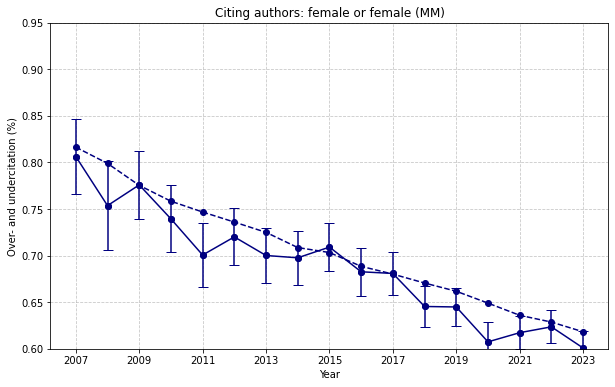

In [808]:
import matplotlib.pyplot as plt

mm_obs_ci_error = []
for i in mm_obs_ci:
    mm_obs_ci_error.append((np.diff(i)/2)[0])

# Years from 2006 to 2023
years = list(range(2007, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MM_observed_vals, label='M/M', marker='o', color = 'navy')
plt.plot(years, MM_expected_vals, label='M/M', marker='o', color = 'navy', linestyle='--')

plt.errorbar(years, MM_observed_vals, yerr=mm_obs_ci_error, label='M/M', marker='o', linestyle='', capsize=5, color = 'navy')
#plt.errorbar(years, MM_expected_vals, yerr=mm_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim()
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: female or female (MM)')
plt.ylim(0.60,0.95)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_ForF_MM', format='pdf')

# Show the plot
plt.show()

In [798]:
print('observed slope CI:',(np.polyfit(years, MM_observed_vals, 1)[0]-np.mean(mm_obs_ci_error),
                           np.polyfit(years, MM_observed_vals, 1)[0]+np.mean(mm_obs_ci_error)))
print('observed slope p-value:',np.mean(mm_obs_p_values))
print('\n')
print('expected slope:',(np.polyfit(years, MM_expected_vals, 1)[0]))

observed slope CI: (-0.03939205797906023, 0.016521027489783756)
observed slope p-value: 0.030220722905632408


expected slope: -0.011779372852658813


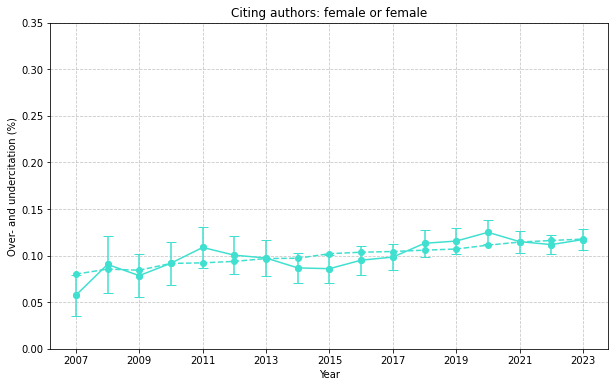

In [809]:
import matplotlib.pyplot as plt

mf_obs_ci_error = []
for i in mf_obs_ci:
    mf_obs_ci_error.append((np.diff(i)/2)[0])

# Years from 2006 to 2023
years = list(range(2007, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MF_observed_vals, label='M/M', marker='o', color = 'turquoise')
plt.plot(years, MF_expected_vals, label='M/M', marker='o', color = 'turquoise', linestyle='--')

plt.errorbar(years, MF_observed_vals, yerr=mf_obs_ci_error, label='M/M', marker='o', linestyle='', capsize=5, color = 'turquoise')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-1,1)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: female or female')
plt.ylim(0,0.35)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_ForF_MF', format='pdf')

# Show the plot
plt.show()

In [800]:
print('observed slope CI:',(np.polyfit(years, MF_observed_vals, 1)[0]-np.mean(mf_obs_ci_error),
                           np.polyfit(years, MF_observed_vals, 1)[0]+np.mean(mf_obs_ci_error)))
print('observed slope p-value:',np.mean(mf_obs_p_values))
print('\n')
print('expected slope:',(np.polyfit(years, MF_expected_vals, 1)[0]))

observed slope CI: (-0.01469861868422045, 0.020034425484044258)
observed slope p-value: 0.6176274545820256


expected slope: 0.0022374576462901707


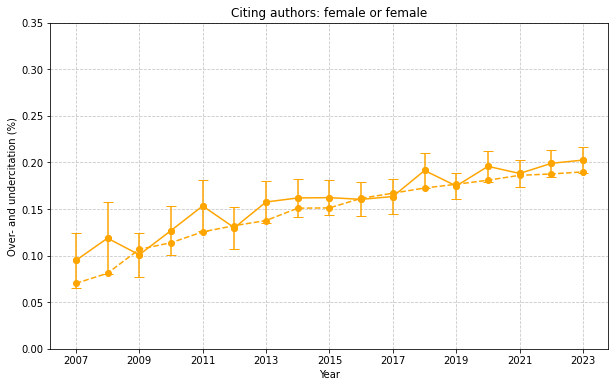

In [810]:
import matplotlib.pyplot as plt

fm_obs_ci_error = []
for i in fm_obs_ci:
    fm_obs_ci_error.append((np.diff(i)/2)[0])

# Years from 2006 to 2023
years = list(range(2007, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, FM_observed_vals, label='M/M', marker='o', color = 'orange')
plt.plot(years, FM_expected_vals, label='M/M', marker='o', color = 'orange', linestyle='--')

plt.errorbar(years, FM_observed_vals, yerr=fm_obs_ci_error, label='M/M', marker='o', linestyle='', capsize=5, color = 'orange')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-1,1)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: female or female')
plt.ylim(0,0.35)


plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_ForF_FM', format='pdf')

# Show the plot
plt.show()

In [802]:
print('observed slope CI:',(np.polyfit(years, FM_observed_vals, 1)[0]-np.mean(fm_obs_ci_error),
                           np.polyfit(years, FM_observed_vals, 1)[0]+np.mean(fm_obs_ci_error)))
print('observed slope p-value:',np.mean(fm_obs_p_values))
print('\n')
print('expected slope:',(np.polyfit(years, FM_expected_vals, 1)[0]))

observed slope CI: (-0.014794323369407175, 0.027407650098056673)
observed slope p-value: 0.5157699855246505


expected slope: 0.007131745030807257


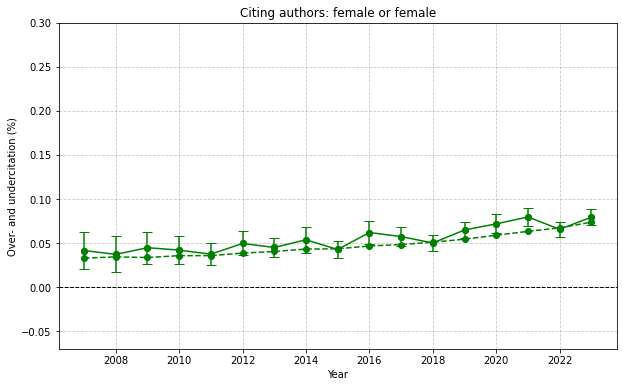

In [811]:
import matplotlib.pyplot as plt

ff_obs_ci_error = []
for i in ff_obs_ci:
    ff_obs_ci_error.append((np.diff(i)/2)[0])

# Years from 2006 to 2023
years = list(range(2007, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

plt.plot(years, FF_observed_vals, label='M/M', marker='o', color = 'green')
plt.plot(years, FF_expected_vals, label='M/M', marker='o', color = 'green', linestyle='--')

plt.errorbar(years, FF_observed_vals, yerr=ff_obs_ci_error, label='M/M', marker='o', linestyle='', capsize=5, color = 'green')
#plt.errorbar(years, MF_exp_line, yerr=MF_errors, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')


# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.ylim(-0.07,0.30)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: female or female')
plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_ForF_FF', format='pdf')

# Show the plot
plt.show()

In [804]:
print('observed slope CI:',(np.polyfit(years, FF_observed_vals, 1)[0]-np.mean(ff_obs_ci_error),
                           np.polyfit(years, FF_observed_vals, 1)[0]+np.mean(ff_obs_ci_error)))
print('observed slope p-value:',np.mean(ff_obs_p_values))
print('\n')
print('expected slope:',(np.polyfit(years, FF_expected_vals, 1)[0]))

observed slope CI: (-0.010379376488418279, 0.015301273449221902)
observed slope p-value: 0.716408440918674


expected slope: 0.0024057188976252335


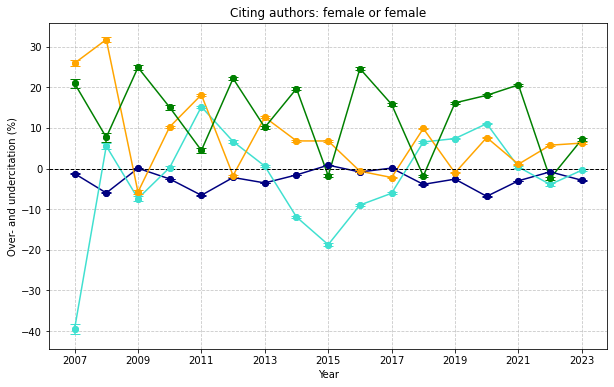

In [812]:
import matplotlib.pyplot as plt

# Years from 2006 to 2023
years = list(range(2007, 2024))

# Plot each list on the same line plot
plt.figure(figsize=(10, 6))

rounded_years = np.ceil(years)
rounded_years = rounded_years.astype(int)

# Set the rounded values as tick labels
plt.xticks(years, rounded_years)
plt.xticks(np.arange(rounded_years.min(), rounded_years.max() + 1, 2))

plt.plot(years, MM_bootstrap_vals, label='M/M', marker='o', color = 'navy')
plt.plot(years, MF_bootstrap_vals, label='M/F', marker='o', color = 'turquoise')
plt.plot(years, FM_bootstrap_vals, label='F/M', marker='o', color = 'orange')
plt.plot(years, FF_bootstrap_vals, label='F/F', marker='o', color = 'green')

plt.errorbar(years, MM_bootstrap_vals, yerr=mm_conf_ints, label='M/M', marker='o', linestyle='', capsize=5, color = 'navy')
plt.errorbar(years, MF_bootstrap_vals, yerr=mf_conf_ints, label='M/F', marker='o', linestyle='', capsize=5, color = 'turquoise')
plt.errorbar(years, FM_bootstrap_vals, yerr=fm_conf_ints, label='F/M', marker='o', linestyle='', capsize=5, color = 'orange')
plt.errorbar(years, FF_bootstrap_vals, yerr=ff_conf_ints, label='F/F', marker='o', linestyle='', capsize=5, color = 'green')

# Add a dotted horizontal line at y=0
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)

# Set plot labels and title
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.xlabel('Year')
plt.ylabel('Over- and undercitation (%)')
plt.title('Citing authors: female or female')
#plt.ylim(-9,1)

plt.savefig('/Users/akashrathi/Desktop/BrownMed/fig4_overall_ex_ForF', format='pdf')

# Show the plot
plt.show()

In [806]:
print('MM slope CI:',(np.polyfit(years, MM_bootstrap_vals, 1)[0]-np.mean(mm_conf_ints),
                           np.polyfit(years, MM_bootstrap_vals, 1)[0]+np.mean(mm_conf_ints)))
print('MM slope p-value:',np.mean(mm_p_vals))

print('MF slope CI:',(np.polyfit(years, MF_bootstrap_vals, 1)[0]-np.mean(mf_conf_ints),
                           np.polyfit(years, MF_bootstrap_vals, 1)[0]+np.mean(mf_conf_ints)))
print('MF slope p-value:',np.mean(mf_p_vals))
print('FM slope CI:',(np.polyfit(years, FM_bootstrap_vals, 1)[0]-np.mean(fm_conf_ints),
                           np.polyfit(years, FM_bootstrap_vals, 1)[0]+np.mean(fm_conf_ints)))
print('FM slope p-value:',np.mean(fm_p_vals))
print('FF slope CI:',(np.polyfit(years, FF_bootstrap_vals, 1)[0]-np.mean(ff_conf_ints),
                           np.polyfit(years, FF_bootstrap_vals, 1)[0]+np.mean(ff_conf_ints)))
print('FF slope p-value:',np.mean(ff_p_vals))

MM slope CI: (-0.06592720764538945, 0.07619704124060353)
MM slope p-value: 0.22440127773355323
MF slope CI: (0.3891436492795123, 1.104620549316481)
MF slope p-value: 0.3192536652981172
FM slope CI: (-1.2208831311839763, -0.6928812799934226)
FM slope p-value: 0.2314709715461621
FF slope CI: (-0.9562844718008959, -0.028279042383429154)
FF slope p-value: 0.24752239309488994
